In [1]:
%run "src\utils\notebook_style.ipynb"
# from src.models.concrete_section import moment_kruemmung_nonlin, conc_querschnitt, conc_nonlinear, Bst550, SAS670, kruemmungsverlauf

from src.utils.input import *


In [2]:
params_krummung, params_zustandslinien, Laststufen = load_params_SV14()

In [3]:
params = dict(params_krummung)
params.update(params_zustandslinien)

params_plot = param_value(params)

# Verformung an einem Vierpunktbiegeversuch{#sec-vierpunkt}

Dieses Kapitel zeigt die Anwendung der Berechnungsmethoden an einem Vierpunktbiegeversuch. Sämtliche Berechnungen sind analog deren in @sec-dreipunkt. Es wird das Ziel verfolgt, die Anwendbarkeit des Berechnungsapparats an einem weiteren Versuch zu verifizieren.

## Versuchsbeschrieb

Entnommen ist der Versuch SV14 aus @Tue2019. Es wird das Verhalten in Feldmitte analysiert, in welcher ausschliesslich Biegung vorherrscht.
Im Zugbereich sind Bewehrungsstäbe mit hochfestem Stahl verlegt. Die Schubbewehrung ist minimal gehalten, sowie unterscheidet sich die Teilung im linken und rechten Bereich des Balkens.

![Lagerung und Belastung des Balkens Versuch SV 14, nachgezeichnet nach @Tue2019](../images/versuchsskizze_14.svg)

Das statische System entspricht einem einfachen Balken. Die Last wird an beiden Angriffspunkten synchron eingeleitet.



## Baustoffeigenschaften

Die Eigenschaften des hochfesten Betonstahls sind aus @annahutte_broschure entnommen. Für den Bst 550 sind Eigenschaften gemäss dem B500B aus der @SIA2013a angesetzt mit einer Erhöhung der Fliessgrenze auf 550 $\text{N}/\text{mm}^2$. Die Betondruckfestigkeit, als einzige Betoneigenschaft, geht aus dem Versuchsbericht @Tue2019 hervor. Diese wird als Zielfestigkeit $f_c$ beschrieben. Die Zylinderdruckfestigkeit, sowie Zugefestigkeit und Elastizitätsmodul sind folgend rechnerisch ermittelt.

Die Zylinderdruckfestigkeit ist entsprechend gewählt um die Zielfestigkeit zu erreichen:

In [4]:
eq_f_c = sp.Eq(f_c, 2.7*f_cc **sp.Rational(2,3))
eq_f_c_num = sp.Eq(f_c,eq_f_c.subs(params).subs(unit.N,1).subs(unit.mm,1).rhs*unit.N/unit.mm**2)
params[f_c] = eq_f_c_num.rhs
display(eq_f_c, eq_f_c_num.evalf(3))

              2/3
f_c = 2.7⋅f_cc   

      35.0⋅newton
f_c = ───────────
                2
      millimeter 

In [5]:
Eq_list.append(eq_f_c_num)

Zugfestigkeit nach @Jaeger2013:

In [6]:
eq_fct = sp.Eq(f_ct, 0.3*f_cc **sp.Rational(2,3))
eq_fct_num = sp.Eq(f_ct, eq_fct.subs(params).evalf(3).rhs.args[0]*unit.N/unit.mm**2)
params[f_ct] = eq_fct_num.rhs
display(eq_fct, eq_fct_num)

               2/3
f_ct = 0.3⋅f_cc   

       3.89⋅newton
f_ct = ───────────
                 2
       millimeter 

Elastizitätsmodul nach @Jaeger2013:

In [7]:
eq_Ec = sp.Eq(E_c, 10000*f_cc**sp.Rational(1,3))
eq_Ec_num = sp.Eq(E_c,eq_Ec.subs(params).evalf(5).rhs.args[0]*unit.N/unit.mm**2)
params[E_c] = eq_Ec_num.rhs
display(eq_Ec, eq_Ec_num)

            3 ______
E_c = 10000⋅╲╱ f_cc 

      36011.0⋅newton
E_c = ──────────────
                 2  
       millimeter   

## Reiner Biegeträger

Dieser Abschnitt beschreibt die Analyse des Balkens als reinen Biegeträger. Es sind Auflagerkräfte, sowie elastische Zustandslinien der Schnittkräfte dargestellt. Als Grundlage dient das statischen System in @fig-stat_system_14_auflagerbreite. 

![Statisches System des Versuchs mit berücksichtigter Auflagerbreite](../images/statisches_system_auflagerbreite_14.svg){#fig-stat_system_14_auflagerbreite}


In [8]:
#| label: tbl-params_reiner_biegetraeger_sv14
#| tbl-cap: Versuchsparameter für den reinen Biegeträger


dict_to_table(params_zustandslinien)

|  ​  | ​  |
|---|---|
| $a_{1} = 0.2 \, \text{m}$ | $a_{2} = 1.5 \, \text{m}$ |
| $a_{3} = 1.0 \, \text{m}$ | $a_{4} = 1.5 \, \text{m}$ |
| $a_{5} = 0.2 \, \text{m}$ | $b = 170.0 \, \text{mm}$ |
| $b_{Auflager} = 100 \, \text{mm}$ | $h = 450.0 \, \text{mm}$ |


### Auflagerkräfte

Die Auflagerkräfte lassen sich anhand der Gleichgewichtsbeziehungen am statisch bestimmten System ermitteln. Die Bestimmung derer ist für den einfachen Balken trivial und entsprechen im Betrag den angreifenden Kräften. In Anlehnung an das Vorgehen beim Dreipunktbiegeversuch @sec-dreipunkt ist folgend eine Ermittlung durch die Gleichgewichtsbeziehungen gezeigt.

 Die Gesamtlänge des Balkens beträgt:

In [9]:
eq_l_tot = sp.Eq(l_tot, a_1 + a_2+a_3+a_4+a_5)
eq_l_tot_num = eq_l_tot.subs(params)
Eq_list.append(eq_l_tot_num)
display(eq_l_tot,eq_l_tot_num.evalf(3))

lₜₒₜ = a₁ + a₂ + a₃ + a₄ + a₅

lₜₒₜ = 4.4⋅meter

In [10]:
Eq_list.append(eq_l_tot_num)

Durch Momentengleichgewicht um die Auflagerpunkte $C$ und $B$ folgen die Beziehungen zwischen Einwirkung und Reaktionskräfte:



In [11]:
eq_ggw_M_C = sp.Eq(0, -F_A*a_2-F_A * (a_2 + a_3) - F_C * (a_2 + a_3 + a_4))
eq_ggw_M_B = sp.Eq(0,F_A * (a_4+a_3)+F_A * a_4 - F_B * (a_2+a_3+a_4))


ggw_solve = sp.solve([eq_ggw_M_C, eq_ggw_M_B], [F_C,F_B])


display(eq_ggw_M_C, eq_ggw_M_B)

0 = -F_A⋅a₂ - F_A⋅(a₂ + a₃) - F_C⋅(a₂ + a₃ + a₄)

0 = F_A⋅a₄ + F_A⋅(a₃ + a₄) - F_B⋅(a₂ + a₃ + a₄)

Durch Auflösung nach den Reaktionskräften folgt:

In [12]:

eq_F_B = sp.Eq(F_B,ggw_solve[F_B])

eq_F_C = sp.Eq(F_C,ggw_solve[F_C])

display(eq_F_B, eq_F_C)

      F_A⋅a₃ + 2⋅F_A⋅a₄
F_B = ─────────────────
         a₂ + a₃ + a₄  

      -2⋅F_A⋅a₂ - F_A⋅a₃
F_C = ──────────────────
         a₂ + a₃ + a₄   

Die Reaktionskräfte dividiert durch die Auflagerbreite resultieren zu den folgenden Streckenlasten, bzw. Reaktionen:

In [13]:
eq_f_B = sp.Eq(f_B, F_B/b_auflager).subs(F_B, eq_F_B.rhs)


display(eq_f_B)

          F_A⋅a₃ + 2⋅F_A⋅a₄    
f_B = ─────────────────────────
      b_Auflager⋅(a₂ + a₃ + a₄)

In [14]:
eq_f_C = sp.Eq(f_C, F_C/b_auflager).subs(F_C, eq_F_C.rhs)

display(eq_f_C)

          -2⋅F_A⋅a₂ - F_A⋅a₃   
f_C = ─────────────────────────
      b_Auflager⋅(a₂ + a₃ + a₄)

In [15]:
eq_f_A = sp.Eq(f_A, F_A/b_auflager)
display(eq_f_A)

         F_A    
f_A = ──────────
      b_Auflager

### Zustandslinien

Die Zustandslinien der Schnittkräfte resultieren aus der Bemühung der hergeleiteten Gleichungen in @sec-kontinua. Dabei ist zu beachten, dass die Zustandslinien lediglich für die maximal gewählte Laststufe gelten. Der Verlauf der Einwirkungen ist in @fig-q_x_sv14 aufgezeigt.

In [16]:
DGL_biegetraeger = sp.Eq(q_x, -EI_I*sp.Derivative(w,x,4))


In [17]:
eq_q_x = sp.Eq(q_x, sp.Piecewise(
    (0, (x>0)&(x<=(a_1 - b_auflager/2))),
    (-eq_f_B.rhs, (x>(a_1 - b_auflager/2))&(x<(a_1 + b_auflager/2))),
    (0, (x>(a_1 + b_auflager/2))&(x<((a_1+a_2) - b_auflager/2))),
    (eq_f_A.rhs, (x>((a_1+a_2) - b_auflager/2))&(x<((a_1+a_2)+ b_auflager/2))),
    (0, (x>((a_1+a_2)+ b_auflager/2))&(x<((a_1+a_2+a_3) - b_auflager/2))),
    (eq_f_A.rhs, (x>((a_1+a_2+a_3) - b_auflager/2))&(x<((a_1+a_2+a_3) + b_auflager/2))),
    (0, (x>((a_1+a_2+a_3)+b_auflager/2))&(x<((a_1+a_2+a_3+a_4)-b_auflager/2))),
    (eq_f_C.rhs, (x>((a_1+a_2+a_3+a_4)- b_auflager/2))&(x<((a_1+a_2+a_3+a_4) +b_auflager/2))),
    (0, True))).simplify()

params_plot = param_value(params)
eq_q_x_num = eq_q_x.subs(params_plot)


In [18]:
Eq_list.append(eq_q_x_num)

In [19]:
x_array = np.linspace(0,np.float64((eq_l_tot.rhs).subs(params_plot)),4000)


q_x_lamb = sp.lambdify((F_A, x),eq_q_x_num.rhs, 'numpy')
q_x_array = []
for Last in Laststufen:
    q_x_array.append(q_x_lamb(Last, x_array))


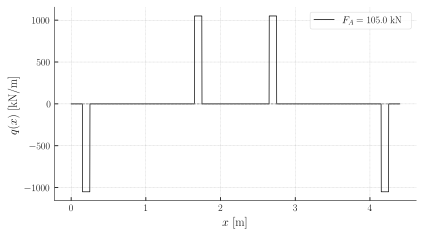

In [20]:
#| label: fig-q_x_sv14
#| fig-cap: Verlauf der Einwirkungen und Reaktionskräften
plt.plot(x_array, q_x_array[-1]/1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(q_x)}$ [kN/m]')
plt.legend()
plt.savefig('../images/q_x_SV14.svg')

plt.show()


Durch Integration der Einwirkung resultiert der Querkraftverlauf.

$$
V(x) = -\int q(x) + c_1
$${#eq-vx_integriert}

Dabei kann mit der Randbedingun $V(0) = 0$ die Integrationskonstante ermittelt werden. Der Verlauf der Querkräfte ist in @fig-v_x_sv14 dargestellt.

In [21]:
eq_V_x = sp.Eq(-V_x,sp.integrate(eq_q_x_num.rhs, x) + c_1)

c_1_num = sp.solve(eq_V_x.rhs.subs(x,0).subs(params),c_1)[0]

V_x_solve = eq_V_x.subs(c_1, c_1_num).simplify()

V_x_lamb = sp.lambdify((F_A,x),V_x_solve.rhs, 'numpy')

V_x_array =[]
for Last in Laststufen:
    V_x_array.append(V_x_lamb(Last,x_array))

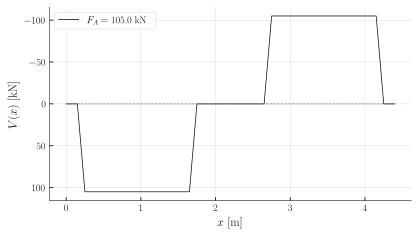

In [22]:
#| label: fig-v_x_sv14
#| fig-cap: Verlauf der Querkräfte 

plt.plot(x_array, V_x_array[-1]/1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(V_x)}$ [kN]')
plt.legend()
plt.savefig('../images/V_x_SV14.svg')

plt.show()


Der Verlauf der Biegemoment lässt sich durch Integration der Querkräfte bestimmen:


$$
M(x) = \int V(x) + c_2
$$

Dabei kann mit der Randbedingung $M(0) = 0$ die Integrationskonstante ermittelt werden. Der Verlauf der Biegemomente ist in @fig-m_x_sv14 dargestellt. Es stellt sich ein Maximum in der Feldmitte ein.

In [23]:
eq_M_x = sp.Eq(M_x, sp.integrate(V_x_solve.rhs,x)+c_2)
c_2_num = sp.solve(eq_M_x.subs(x,0).rhs.subs(params), c_2)[0]
M_x_solve = eq_M_x.subs(c_2, c_2_num).simplify()
M_x_lamb = sp.lambdify((F_A, x),M_x_solve.rhs, 'numpy')


M_x_array = []
for Last in Laststufen:
    M_x_array.append(M_x_lamb(Last, x_array))


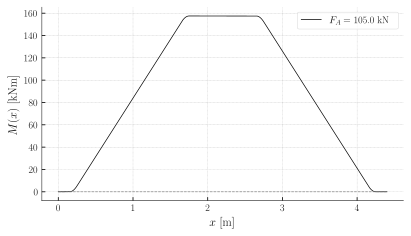

In [24]:
#| label: fig-m_x_sv14
#| fig-cap: Verlauf der Biegemomente 

plt.plot(x_array, M_x_array[-1]/1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(M_x)}$ [kNm]')
plt.legend()
plt.savefig('../images/M_x_SV14.svg')

plt.show()

Neben den resultierenden Biegemomenten aus der Einwirkung kann ein Biegemoment, induziert durch die Längszukraft aus der Querkraft, ermittelt werden. Dies ist mit einem Versatzmass berücksichtigt. Dabei gilt das Versatzmass lediglich für die Längszugkraft. Multipliziert mit der statischen Höhe resultiert der Versatz des Biegemoments

$$
h_{versatz} = \frac{V \cdot \cot(\theta_{c3})}{2}
$${#eq-versatzmass}

$$
M_{versatz} = \frac{V \cdot \cot(\theta_{c3})}{2} \cdot z
$${#eq-versatzmoment}

Der Momentenverlauf in @fig-m_x_sv14 ist mit dem Versatzmass zu erhöhen. Dargestellt ist dies in @fig-m_x_versatz_sv14. Bei der Momentenspitze bildet sich ein Plateu aus. 
Die statische Höhe beträgt:


In [25]:
theta_c3 = 30 #in Grad

#Berechnung der statischen Höhe für die einzelnen Bewehrungslagen
eq_d_1 = sp.Eq(d_1,h - c_nom - sp.Rational(0.5) * diam_s_1)
eq_d_1_num = eq_d_1.subs(params)
Eq_list.append(eq_d_1_num)


eq_d_2 = sp.Eq(d_2,h - c_nom - sp.Rational(0.5) * diam_s_2)
eq_d_2_num = eq_d_2.subs(params)
Eq_list.append(eq_d_2_num)

#Der Mittelwert der Bewehrungslagen
eq_d_mean = sp.Eq(d, (d_1 + d_2) / 2)
eq_d_mean_num = eq_d_mean.subs(d_1, eq_d_1_num.rhs).subs(d_2, eq_d_2_num.rhs)
Eq_list.append(eq_d_mean_num)

#Abschätzung des inneren Hebelarms anhand der mittleren statischen Höhe
eq_z_schaetzung = sp.Eq(z, 0.9*d)
eq_z_schaetzung_num = eq_z_schaetzung.subs(d, eq_d_mean_num.rhs)


#Bestimmung des Versatzmasses
h_versatz = abs(V_x)*sp.cot(sp.rad(theta_c3))/2 * eq_z_schaetzung_num.rhs.args[0]/1000
h_versatz_lamb = sp.lambdify((V_x), h_versatz, 'numpy')

h_versatz_array = []
for V_x in V_x_array:
    h_versatz_array.append(h_versatz_lamb(V_x))


display(eq_d_1, eq_d_1_num.evalf(3), 
        eq_d_2, eq_d_2_num.evalf(3))



       \oslash_s,1           
d₁ = - ─────────── - cₙₒₘ + h
            2                

d₁ = 406.0⋅millimeter

       \oslash_s,2           
d₂ = - ─────────── - cₙₒₘ + h
            2                

d₂ = 409.0⋅millimeter

Die mittlere statische Höhe folgt zu:

In [26]:
display(eq_d_mean, eq_d_mean_num.evalf(3))


    d₁   d₂
d = ── + ──
    2    2 

d = 408.0⋅millimeter

Der Hebelarm der inneren Kräfte:

In [27]:
display(eq_z_schaetzung, eq_z_schaetzung_num.evalf(3))

z = 0.9⋅d

z = 367.0⋅millimeter

Sowie der gewählte Winkel. Die Wahl des Winkels entspricht dem unteren Grenzwert der @SIA2013a.

In [28]:

display(Markdown(f'$$\n \\theta_{{c3}} = {theta_c3}° \n$$'+'{#eq-theta_c3_sv14}'))


$$
 \theta_{c3} = 30° 
$${#eq-theta_c3_sv14}

In [29]:
def calculate_m_c_versatz(mx, versatz):
    
    mx_sol_list = []
    maximum = max(mx)
    for i in range(0,len(mx)):
        if (mx[i] + versatz[i]) >= maximum:
            mx_sol =  maximum
            
        else:
            mx_sol = mx[i]+versatz[i]
        mx_sol_list.append(mx_sol)
    
    return mx_sol_list
    
M_x_array_versatz = []
for i in range(0,len(M_x_array)):
    
    mx_versetzt = calculate_m_c_versatz(M_x_array[i], h_versatz_array[i])
    M_x_array_versatz.append(np.array(mx_versetzt))

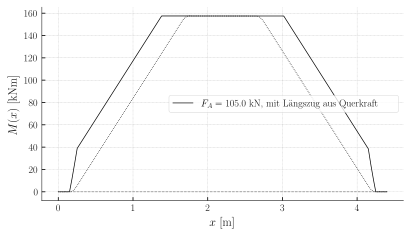

In [30]:
#| label: fig-m_x_versatz_sv14
#| fig-cap: Verlauf der Biegemomente mit Längszugkraft aus Querkraft
plt.plot(x_array, M_x_array[-1]/1000, color='black', linestyle='dotted')
plt.plot(x_array, M_x_array_versatz[-1]/1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN, mit Längszug aus Querkraft')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(M_x)}$ [kNm]')
plt.legend()
plt.savefig('../images/M_x_versatz_SV14.svg')

plt.show()

In [31]:
eq_phi_x = sp.Eq(phi_x, sp.integrate(M_x_solve.rhs/EI,x)+c_3)


#### Biegesteifigkeit - Vollständig ungerissen

Wie in @sec-kontinua hergeleitet, sind die Gleichgewichtsbetrachtungen nicht ausreichend um die Verdrehung und Verformung zu beschreiben. Die Werkstoffbeziehung bedingt eine Biegesteifigkeit. Dabei wird von einer konstanten Biegesteifigkeit ausgegangen. Für einen ungerissenen Querschnitt unter Vernachlässigung der Bewehrung folgt diese zu:

In [32]:
eq_EI = sp.Eq(EI, E_c * b*h**3/12)
eq_EI_num = eq_EI.subs(params)


In [33]:
Eq_list.append(eq_EI_num)

In [34]:
display(eq_EI, unit.convert_to(eq_EI_num.evalf(3), [unit.kilonewton, unit.meter]))

            3
     E_c⋅b⋅h 
EI = ────────
        12   

                             2
EI = 4.65e+4⋅kilonewton⋅meter 

Der Verlauf der Verdrehung entspricht dem Integrierten Verlauf der Biegemomente, dividiert durch die Biegesteifigkeit.

$$
\varphi(x) = \frac{1}{EI}\int M(x) + c_3
$${#eq-verdrehung}

Abschliessend lässt sich die Verformung anhand der Verdrehung ermitteln.

$$
w(x) = \int -\varphi(x) + c_4
$${#eq-verformung}


Mit den Randbedingungen $w(C) = 0$ und $w(B) = 0$ sind die Integrationskonstanten bestimmt. Die elastische Verformung für einen ungerissenen Querschnitt ist in @fig-w_x_sv14 dargestellt. 



In [35]:
eq_w_x = sp.Eq(w_x, -sp.integrate(eq_phi_x.rhs, x)+ c_4)
eq_w_x.subs(params_plot)
c_solve = sp.solve([eq_w_x.rhs.subs(x,a_1).subs(params_plot), eq_w_x.rhs.subs(x,a_1 + a_2+a_3 + a_4).subs(params_plot)],[c_3, c_4])


eq_w_x_solve = eq_w_x.subs(c_solve).subs(params_plot)


w_x_lamb = sp.lambdify((F_A,x, EI),eq_w_x_solve.rhs)

In [36]:
w_x_array_ungerissen = []
for Last in Laststufen:
    w_x_array_ungerissen.append(w_x_lamb(Last, x_array, np.float64(eq_EI.rhs.subs(params_plot))))



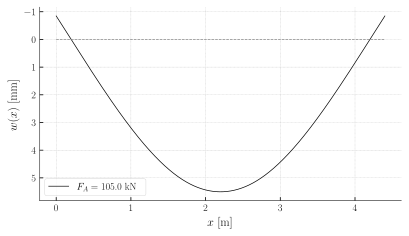

In [37]:
#| label: fig-w_x_sv14
#| fig-cap: Verlauf der Verformung für eine konstante ungerissene Biegesteifigkeit

plt.plot(x_array, w_x_array_ungerissen[-1]*1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')
plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(w_x)}$ [mm]')
plt.legend()
plt.savefig('../images/w_x_SV14.svg')

plt.show()

## Mohrsche Analogie

Das Vorgehen ist in @sec-mohrsche_analogie beschrieben. Der bereits bestimmte Momentenverlauf gemäss @fig-m_x_sv14, dividiert durch die ungerissene Biegesteifigkeit, ist als Einwirkung auf das System anzusetzen. Dargestellt ist dies in @fig-q_x_mohr_sv14.

In [38]:
eq_q_x_mohr = sp.Eq(q_x_a, M_x_solve.rhs / EI)
eq_q_x_mohr_num = eq_subs(eq_q_x_mohr, eq_EI).subs(params_plot)
q_x_mohr_lamb = sp.lambdify((F_A, x), eq_q_x_mohr_num.rhs, 'numpy')

In [39]:
q_x_mohr_array =[]
for Last in Laststufen:
    q_x_mohr_array.append(q_x_mohr_lamb(Last, x_array)) 

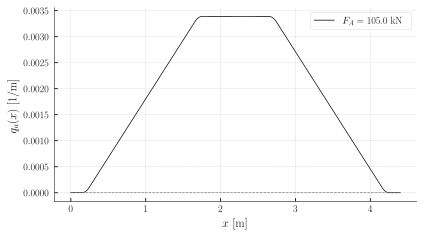

In [40]:
#| label: fig-q_x_mohr_sv14
#| fig-cap: Verlauf der Einwirkungen auf das analoge System
plt.plot(x_array, q_x_mohr_array[-1], color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(q_x_a)}$ [1/m]')
plt.legend()
plt.savefig('../images/q_x_mohr_SV14.svg')

plt.show()

Aufgrund des bereits bekannten Verlaufs der Verformungen gemäss @fig-w_x_sv14 sind für das analoge System Gelenke bei den Verformungsnullpunkte einzuführen sowie Einspannungen beim Stabanfang und Ende. Dies entspricht den Lagerungsbedingungen gemäss @fig-randbedingungen_analogiesysteme.



In [41]:
eq_V_x_mohr = sp.Eq(V_x_a, -sp.integrate(eq_q_x_mohr_num.rhs, x)+c_1)
eq_M_x_mohr = sp.Eq(M_x_a, sp.integrate(eq_V_x_mohr.rhs, x)+c_2)
randbedingung_1 = sp.Eq(eq_M_x_mohr.rhs.subs(x, a_1),0).subs(params_plot)
randbedingung_2 = sp.Eq(eq_M_x_mohr.rhs.subs(x, a_1 +a_2+a_3 +a_4),0).subs(params_plot)

c_a_solve = sp.solve([randbedingung_1, randbedingung_2],[c_1,c_2])
c_a_solve
eq_V_x_mohr_subs = eq_V_x_mohr.subs(c_a_solve)
eq_M_x_mohr_subs = eq_M_x_mohr.subs(c_a_solve)


V_x_mohr_lamb = sp.lambdify((F_A,x), eq_V_x_mohr_subs.rhs, 'numpy')
M_x_mohr_lamb = sp.lambdify((F_A,x), eq_M_x_mohr_subs.rhs, 'numpy')

In [42]:
V_x_mohr_array =[]
M_x_mohr_array =[]
for Last in Laststufen:
    V_x_mohr_array.append(V_x_mohr_lamb(Last,x_array))
    M_x_mohr_array.append(M_x_mohr_lamb(Last,x_array))

Der Querkraftverlauf für das analoge Sytem ist in @fig-v_x_mohr_sv14 aufgezeigt. Die Querkraft ist einheitslos, da es sich um die Verdrehung handelt.

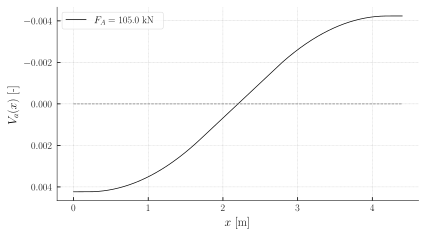

In [43]:
#| label: fig-v_x_mohr_sv14
#| fig-cap: Verlauf der Querkräfte für das Analogiesystem

plt.plot(x_array, V_x_mohr_array[-1], color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(V_x_a)}$ [-]')
plt.legend()
plt.savefig('../images/V_x_mohr_SV14.svg')

plt.show()


Der Biegemomentenverlauf für das analoge System zeigt die @fig-m_x_mohr_sv14. Der Momentenverlauf entspricht der Verformung und ist folglich in [mm] dargestellt.

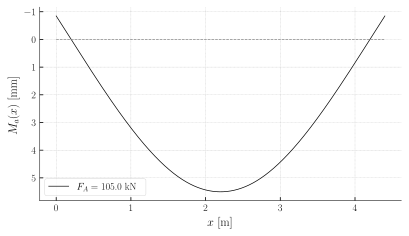

In [44]:
#| label: fig-m_x_mohr_sv14
#| fig-cap: Verlauf der Biegemomente für das Analogiesystem

plt.plot(x_array, M_x_mohr_array[-1]*1000, color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
plt.plot(x_array, 0*x_array, color='gray', linestyle='dashed')

plt.gca().invert_yaxis()
plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'${sp.latex(M_x_a)}$ [mm]')
plt.legend()
plt.savefig('../images/w_x_mohr_SV14.svg')

plt.show()

Erwartungsgemäss entspricht der Verlauf der Verformung @fig-m_x_mohr_sv14 dem in @fig-w_x_sv14.

## Abschätzung nach Norm
Nach der bestimmten elastischen Verformung kann die Verformung anhand des vollständig gerissenen Querschnitts nach @SIA2013a ermittelt werden. Ohne Druckbewehrung und Kriecheinflüsse folgt die Gleichung zu:


$$
w_{1II,SIA} = \frac{0.75}{10\rho^{0.7}}\left(\frac{h}{d}\right)^3 w_1
$${#eq-w_1_II_sia}

Dabei entspricht der geometrische Bewehrungsgehalt:

In [45]:
eq_rho = sp.Eq(rho, A_s/(b*d))
display(eq_rho)


     Aₛ
ρ = ───
    b⋅d

In [46]:
Eq_list.append(eq_rho)

Vereinfacht wird der Stab in der Mitte der Zugzone der Querschnittsfläche hinzugezählt, unter Berücksichtigung der kleineren Fliessgrenze. Die Querschnittsfläche der Stäbe im Zugbereich folgt zu:

In [47]:
eq_A_s_1 = sp.Eq(A_s_1, sp.Mul(2,sp.pi * diam_s_1 **2 / (4), evaluate=False))
eq_A_s_2 = eq_A_s_1.subs(A_s_1, A_s_2).subs(diam_s_1, diam_s_2)
eq_A_s = sp.Eq(A_s, A_s_1 + A_s_2)

eq_A_s_1_num = unit.convert_to(eq_A_s_1.subs(params), unit.mm)
eq_A_s_2_num = unit.convert_to(eq_A_s_2.subs(params), unit.mm)
eq_A_s_num = unit.convert_to(eq_A_s.subs(A_s_1, eq_A_s_1_num.rhs).subs(A_s_2, eq_A_s_2_num.rhs), unit.mm)
display(eq_A_s, eq_A_s_num.evalf(4))


Aₛ = Aₛ ₁ + Aₛ ₂

                     2
Aₛ = 735.1⋅millimeter 

In [48]:
Eq_list.append(eq_A_s_num)
Eq_list.append(eq_A_s_1_num)
Eq_list.append(eq_A_s_2_num)


Die mittlere statischen Höhen für beide Stäbe in der Zugzone entspricht:

In [49]:

display(eq_d_mean, eq_d_mean_num.evalf(3))


    d₁   d₂
d = ── + ──
    2    2 

d = 408.0⋅millimeter

Die Verformung entspricht abschliessend:

In [50]:
eq_w_1_gerissen_norm = sp.Eq(w_1_gerissen_norm, sp.Mul(0.75/(10*rho)**sp.Rational(0.7) , (h/d)**3 * w_1, evaluate=False))
eq_w_1_gerissen_norm_num = unit.convert_to(eq_subs(eq_w_1_gerissen_norm, *Eq_list).subs(params).subs(w_1, max(w_x_array_ungerissen[-1])*unit.m), unit.mm)
w_1_gerissen_norm_lamb = sp.lambdify((w_1),eq_w_1_gerissen_norm.rhs.subs(rho, eq_rho.rhs).subs(d, eq_d_1_num.rhs.args[0]).subs(A_s, eq_A_s_num.rhs).subs(params).subs(unit.mm,1), 'numpy')
display(eq_w_1_gerissen_norm_num.evalf(3))


w_1_II,SIA = 26.7⋅millimeter

In [51]:

Eq_list.append(eq_w_1_gerissen_norm_num)

## Numerische Integration der Krümmung


### Grundlagen

Um sich von der Betrachtung einer konstanten Biegesteifigkeit zu lösen, hilft die Anwendung einer verfeinerten Momenten-Krümmungsbeziehung. Folgend wird ein Momentenkrümmungsdiagramm für den Querschnitt aus dem beschriebenen Versuch berechnet. Die vorhandene Querkraftbewehrung ist nicht dargestellt in @fig-qs_sv14.


![Querschnitt des Versuchs A3 zur Bestimmung des Momenten-Krümmungdiagramms](../images/QS_Versuch14.svg){#fig-qs_sv14}


Vereinfacht wird der Querschnitt folgender massen:


![Vereinfachung der Bewehrungsführung](../images/QS_14.svg){#fig-qs_sv14_vereinfachung}

Die Parameter in @tbl-params_krummung_sv14 finden Einfluss in die Berechnungen.

In [52]:
#| label: tbl-params_krummung_sv14
#| tbl-cap: Versuchsparameter für die verfeinerte Momenten-Krümmungsbeziehung


dict_to_table(params_krummung)

|  ​  | ​  |
|---|---|
| $E_{s} = 205000.0 \, \frac{\text{N}}{\text{mm}^{2}}$ | $\oslash_{s,1} = 18.0 \, \text{mm}$ |
| $\oslash_{s,2} = 12.0 \, \text{mm}$ | $c_{nom} = 35.0 \, \text{mm}$ |
| $f_{cc} = 46.7 \, \frac{\text{N}}{\text{mm}^{2}}$ | $f_{su,1} = 800.0 \, \frac{\text{N}}{\text{mm}^{2}}$ |
| $f_{su,2} = 657.0 \, \frac{\text{N}}{\text{mm}^{2}}$ | $f_{sy,1} = 670.0 \, \frac{\text{N}}{\text{mm}^{2}}$ |
| $f_{sy,2} = 550.0 \, \frac{\text{N}}{\text{mm}^{2}}$ | $\varepsilon_{cu} = 0.003$ |
| $\varepsilon_{su} = 0.05$ | ​  |


Neben den Parametern wird das Stoffgesetz für den Betonstahl in @fig-stahlkennlinie_sv14 hinterlegt. Das Bilineare, bzw. linear-elastisch linear-plastische Spannungs-Dehnungsdiagramm für den Betonstahl hält den Rechenaufwand klein und liefert eine ausreichende Genauigkeit. Eine Berücksichtigung des verfestigenden Verhaltens ist essentiell um die Verformungen nach dem Fliessen des Betonstahls näherungsweise zu bestimmen. Das Diagramm ist definiert bis zur Bruchdehnung des Stahls. Das Verhalten gilt ebenso im negativen Spannungs-Dehnungs Bereich.

In [53]:
eq_f_sy_1_lin = sp.Eq(f_sy, a +b*f_sy/E_s)
eq_f_su_1_lin = sp.Eq(f_su, a + b*epsilon_su)
eq_s1_lin = sp.Eq(sigma_epsilon_s, a + b * epsilon_s).subs(sp.solve([eq_f_sy_1_lin,eq_f_su_1_lin],[a,b]))


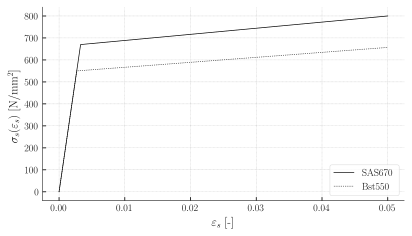

In [54]:
#| label: fig-stahlkennlinie_sv14
#| fig-cap: Spannungs-Dehnungs Diagramm des Bewehrungsstahls linear elastisch-linear verfestigend plastisch

#Funktionsverlauf für linear elastisch, linear plastisch
eq_sigma_epsilon_s = sp.Eq(sigma_epsilon_s, sp.Piecewise(
    (E_s * epsilon_s, (epsilon_s<=f_sy / E_s)&(epsilon_s>=0)),
    (eq_s1_lin.rhs.subs(params_plot), (epsilon_s<=epsilon_su)&(epsilon_s>=f_sy / E_s))
    ))

# Bezogen auf die zwei Stahlsorten
eq_sigma_epsilon_s1 = eq_sigma_epsilon_s.subs(f_sy, f_sy_1).subs(f_su, f_su_1)
eq_sigma_epsilon_s2 = eq_sigma_epsilon_s.subs(f_sy, f_sy_2).subs(f_su, f_su_2)


eq_sigma_epsilon_s_num = eq_sigma_epsilon_s.subs(params_plot) 
eq_sigma_epsilon_s_lamb = sp.lambdify((f_sy, f_su, epsilon_s),eq_sigma_epsilon_s_num.rhs)


#Dehnungswerte für den Plot
epsilon_s_array = np.linspace(0, np.float64(epsilon_su.subs(params_plot)), 2000)

#Für die Stäbe 1
eq_sigma_epsilon_array_1 = eq_sigma_epsilon_s_lamb(f_sy_1.subs(params_plot), 
                                                 f_su_1.subs(params_plot), epsilon_s_array)

# Für den Stab 2
eq_sigma_epsilon_array_2 = eq_sigma_epsilon_s_lamb(f_sy_2.subs(params_plot), 
                                                 f_su_2.subs(params_plot), epsilon_s_array)


plt.plot(epsilon_s_array, eq_sigma_epsilon_array_1/1000**2, color='black', label='SAS670')
plt.plot(epsilon_s_array, eq_sigma_epsilon_array_2/1000**2, color='black', linestyle='dotted', label='Bst550')

plt.xlabel(f'${sp.latex(epsilon_s)}$ [-]')
plt.ylabel(f'${sp.latex(sigma_epsilon_s)}$ [N/mm$ ^2$]')
plt.legend()
plt.savefig('../images/spannung_dehnung_stahl_SV14.svg')

plt.show()

In [55]:
eq_sigma_epsilon_c = sp.Eq(sigma_epsilon_c,sp.Piecewise((E_c * epsilon_c, (epsilon_c <=f_ct/E_c)&(epsilon_c >-f_c/E_c)), (-f_c, epsilon_c< -f_c/E_c)))
eq_sigma_epsilon_c_num = eq_sigma_epsilon_c.subs(params_plot)



Die Betonkennlinie in @fig-betonkennlinie_sv14 zeigt ein linear-elastisches ideal-plastisches verhalten. Im positiven Bereich lässt sich die Betonspannung bis zur Betonzugfestigkeit erhöhen, im negativen Spannungsbereich beginnt ein Plastifizieren beim Erreichen der Betondruckfestigkeit. Bis zur Bruchstauchung ist dies definiert.

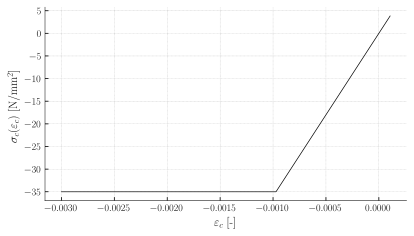

In [56]:
#| label: fig-betonkennlinie_sv14
#| fig-cap: Spannungs-Dehnungs Diagramm des Betons linear elastisch-ideal plastisch


eq_sigma_epsilon_c_lamb = sp.lambdify((epsilon_c),eq_sigma_epsilon_c_num.rhs)


epsilon_c_array = np.linspace(-np.float64(epsilon_cu.subs(params_plot)), np.float64(epsilon_cu.subs(params_plot)), 2000)
eq_sigma_epsilon_c_array = eq_sigma_epsilon_c_lamb(epsilon_c_array)


plt.plot(epsilon_c_array, eq_sigma_epsilon_c_array/1000**2, color='black')

plt.xlabel(f'${sp.latex(epsilon_c)}$ [-]')
plt.ylabel(f'${sp.latex(sigma_epsilon_c)}$ [N/mm$ ^2$]')
plt.savefig('../images/spannung_dehnung_beton_SV14.svg')

plt.show()

### Querschnittsanalyse

Mittels einer Querschnittsanalyse lassen sich die unterschiedlichen Zustände des Momenten-Krümmungdiagramms ermitteln.

#### Schwerpunkt des Querschnitts

Durch die Bestimmung der Wertigkeit $n$ kann der Querschnitt als homogener Betonquerschnitt zur Bestimmung des Schwerpunkts behandelt werden.

In [57]:
eq_n = sp.Eq(n, E_s / E_c)
eq_n_num = eq_n.subs(params)
display(eq_n,eq_n_num.evalf(3))


     Eₛ
n = ───
    E_c

n = 5.69

In [58]:
Eq_list.append(eq_n_num)

Die Querschnittsfläche der Bewehrung beträgt:

In [59]:
display(eq_A_s, eq_A_s_num.evalf(4))

Aₛ = Aₛ ₁ + Aₛ ₂

                     2
Aₛ = 735.1⋅millimeter 

Die Betonquerschnittsfläche:

In [60]:
eq_A_c = sp.Eq(A_c, b*h)
eq_A_c_num = unit.convert_to(eq_A_c.subs(params), unit.mm)
display(eq_A_c, eq_A_c_num)


A_c = b⋅h

                        2
A_c = 76500.0⋅millimeter 

In [61]:
Eq_list.append(eq_A_c_num)

Die ideelle Querschnittsfläche resultiert zu:

In [62]:
eq_Ai = sp.Eq(A_i, A_c + A_s *(n-1))
eq_Ai_num = unit.convert_to(eq_subs(eq_Ai, *Eq_list), unit.mm)
display(eq_Ai,eq_Ai_num.evalf(6))


Aᵢ = A_c + Aₛ⋅(n - 1)

                       2
Aᵢ = 79949.7⋅millimeter 

In [63]:
Eq_list.append(eq_Ai_num)

Und die z-Koordinate des Schwerpunkts folgt abschliessend zu:

In [64]:
eq_zeta_c = sp.Eq(zeta_c, sp.Mul(1/A_i,A_c * h/2 + (A_s_1*(h-d_1) + A_s_2*(h-d_2))*(n-1), evaluate=False))
eq_zeta_c_num = unit.convert_to(eq_subs(eq_zeta_c, *Eq_list).subs(params), unit.mm)
display(eq_zeta_c, eq_zeta_c_num.simplify().evalf(3))


      A_c⋅h                                            
      ───── + (n - 1)⋅(Aₛ ₁⋅(-d₁ + h) + Aₛ ₂⋅(-d₂ + h))
        2                                              
ζ_c = ─────────────────────────────────────────────────
                              Aᵢ                       

ζ_c = 217.0⋅millimeter

In [65]:
Eq_list.append(eq_zeta_c_num)

#### Flächenträgheitsmoment

Das Flächenträgheitsmoment wird ebenfalls am ideellen Querschnitt bestimmt. Die Eigenträgheitsmomente der Kreisquerschnitte der Bewehrung sind nicht berücksichtigt, lediglich der Steiner-Anteil fliesst in die Berechnung ein:

In [66]:
eq_I_1 = sp.Eq(I_1, b * h**3/12 +b*h*(h/2 - zeta_c)**2 + (A_s_1 *(c_nom + sp.Rational(0.5)*diam_s_1 - zeta_c)**2 + A_s_2 *(c_nom + sp.Rational(0.5)*diam_s_2 - zeta_c)**2)* (n-1))
eq_I_1_num = unit.convert_to(eq_subs(eq_I_1, *Eq_list).subs(params), unit.mm)
display(eq_I_1, eq_I_1_num.evalf(3))


          3                2           ⎛                               2      
       b⋅h        ⎛h      ⎞            ⎜     ⎛\oslash_s,1             ⎞       
I__I = ──── + b⋅h⋅⎜─ - ζ_c⎟  + (n - 1)⋅⎜Aₛ ₁⋅⎜─────────── + cₙₒₘ - ζ_c⎟  + Aₛ 
        12        ⎝2      ⎠            ⎝     ⎝     2                  ⎠       

                            2⎞
  ⎛\oslash_s,2             ⎞ ⎟
₂⋅⎜─────────── + cₙₒₘ - ζ_c⎟ ⎟
  ⎝     2                  ⎠ ⎠

                        4
I__I = 1.4e+9⋅millimeter 

In [67]:
Eq_list.append(eq_I_1_num)


#### Ungerissen - Zustand 1

Der Querschnitt verbleibt elastisch. Folglich kann das Flächenträgheitsmoment mit $E_c$ multipliziert werden und es resultiert die ungerissene Biegesteifigkeit:

In [68]:
eq_EI_1 = sp.Eq(EI_I, I_1 * E_c)
eq_EI_I_num = eq_subs(eq_EI_1, *Eq_list).subs(params)

In [69]:
display(eq_EI_1, unit.convert_to(eq_EI_I_num.evalf(4),[unit.kilonewton, unit.meter]))

EI__I = E_c⋅I__I

                                 2
EI__I = 5.042e+4⋅kilonewton⋅meter 

In [70]:
Eq_list.append(eq_EI_I_num)

##### Rissmoment

Durch die Ermittlung des Rissmoments kann die Krümmung vor dem Reissen des Betons ermittelt werden. Die Betonzugkraft wird nicht berücksichtigt.

![Querschnittsanalyse vor dem Reissen des Betons](../images/QS_14_analyse_5.svg){#fig-qs2_sv14}


Die Betondruckspannung beträgt:

In [71]:
eq_sigma_c_inf1 = sp.Eq(sigma_c_1,f_ct / zeta_c * (h-zeta_c))
eq_sigma_c_inf1_num = unit.convert_to(eq_subs(eq_sigma_c_inf1,*Eq_list).subs(params),unit.mm)
display(eq_sigma_c_inf1, eq_sigma_c_inf1_num.evalf(3))


        f_ct⋅(h - ζ_c)
σ_c_1 = ──────────────
             ζ_c      

        4.17⋅newton
σ_c_1 = ───────────
                  2
        millimeter 

In [72]:

Eq_list.append(eq_sigma_c_inf1_num)


Der Hebelarm der inneren Kräfte unter Vernachlässigung der Zugbewehrung folgt zu:

In [73]:
eq_z_r = sp.Eq(z_1, 2*zeta_c/2 + 2*(h-zeta_c)/3)
eq_z_r_num = unit.convert_to(eq_subs(eq_z_r, *Eq_list).subs(params), unit.mm)
display(eq_z_r, eq_z_r_num.evalf(3))

     2⋅h   ζ_c
z₁ = ─── + ───
      3     3 

z₁ = 372.0⋅millimeter

In [74]:
Eq_list.append(eq_z_r_num)


Die Betondruckkraft ist definiert nach:

In [75]:
eq_F_c_r = sp.Eq(F_c1,  sigma_c_1 * b * (h-zeta_c)/2)
eq_F_c_r_num = eq_subs(eq_F_c_r, *Eq_list).subs(params)

display(eq_F_c_r, unit.convert_to(eq_F_c_r_num.evalf(3), unit.kilonewton))


        b⋅σ_c_1⋅(h - ζ_c)
F_c,1 = ─────────────────
                2        

F_c,1 = 82.6⋅kilonewton

In [76]:
Eq_list.append(eq_F_c_r_num)


Und das Rissmoment resultiert schliesslich zu:

In [77]:
eq_M_r = sp.Eq(M_r, F_c1 * z_1)
eq_M_r_num = eq_subs(eq_M_r, *Eq_list)

display(eq_M_r, unit.convert_to(eq_M_r_num.evalf(4), [unit.kilonewton, unit.meter]))

Mᵣ = F_c,1⋅z₁

Mᵣ = 30.75⋅kilonewton⋅meter

In [78]:
Eq_list.append(eq_M_r_num)


Aus dem Rissmoment folgt die Krümmung beim Reissen:

In [79]:
eq_chi_r = sp.Eq(chi_r, M_r / (EI_I))
eq_chi_r_num = unit.convert_to(eq_subs(eq_chi_r, *Eq_list), unit.m)

Eq_list.append(eq_chi_r_num)
display(eq_chi_r,eq_chi_r_num.evalf(3))

          Mᵣ 
\chiᵣ = ─────
        EI__I

        0.00061
\chiᵣ = ───────
         meter 

Die Neigung linearen Funktion des ungerissenen Zustands im Momentenkrümmungsdiagramm ist durch die Biegesteifigkeit definiert. Der Endpunkts des Zustand 1 definiert das Rissmoment mit der entsprechenden Krümmung.

#### Gerissen Elastisch - Zustand 2

Der Querschnitt nach dem Reissen ist in @fig-qs3 dargestellt. Der Betonstahl hat die Fliessgrenze noch nicht erreicht. Der Beton die Druckfestigkeit ebenfalls nicht.

![Querschnittsanalyse nach dem Reissen des Betons](../images/QS_14_analyse_4.svg){#fig-qs3_sv14}

Dabei beträgt die statische Höhe:

In [80]:

display(eq_d_1, eq_d_1_num, eq_d_2, eq_d_2_num)

       \oslash_s,1           
d₁ = - ─────────── - cₙₒₘ + h
            2                

d₁ = 406.0⋅millimeter

       \oslash_s,2           
d₂ = - ─────────── - cₙₒₘ + h
            2                

d₂ = 409.0⋅millimeter

Mittels Gleichgewicht der Kräfte lässt sich die Betondruckzonenhöhe und folglich die gerissene Biegesteifigkeit herleiten. Die Betonstahlzugkraft beträgt:




In [81]:
eq_F_s21 = sp.Eq(F_s21, sigma_s_21*A_s_1)
eq_F_s22 = eq_F_s21.subs(sigma_s_21, sigma_s_22).subs(F_s21, F_s22).subs(A_s_1, A_s_2)

display(eq_F_s21, eq_F_s22)



F_s2,1 = Aₛ ₁⋅σ_s_2,1

F_s2,2 = Aₛ ₂⋅σ_s_2,2

In [82]:
Eq_list.append(eq_F_s21)
Eq_list.append(eq_F_s22)

Die Betonstahlspannung für linear elastisches Verhalten folgt zu:

In [83]:
eq_sigma_s21 = sp.Eq(sigma_s_21, epsilon_s21 * E_s)
eq_sigma_s22 = eq_sigma_s21.subs(sigma_s_21, sigma_s_22).subs(epsilon_s21, epsilon_s22)

display(eq_sigma_s21, eq_sigma_s22)

σ_s_2,1 = Eₛ⋅varepsilon_s2,1

σ_s_2,2 = Eₛ⋅varepsilon_s2,2

In [84]:

Eq_list.append(eq_sigma_s21)
Eq_list.append(eq_sigma_s22)


Die Betondruckkraft anhand des dreieckigen Verlaufs in @fig-qs3 beträgt:


In [85]:
eq_F_c2 = sp.Eq(F_c2, sigma_c_2 * b * x_2 /2)

eq_F_c2

        b⋅σ_c_2⋅x₂
F_c,2 = ──────────
            2     

In [86]:
Eq_list.append(eq_F_c2)



Die Betonspannung ebenfalls bestimmt durch ein linear elastisches Verhalten ist definiert durch:

In [87]:
eq_sigma_c_2 = sp.Eq(sigma_c_2, epsilon_c2* E_c)
eq_sigma_c_2

σ_c_2 = E_c⋅varepsilon_c,2

In [88]:
Eq_list.append(eq_sigma_c_2)


Die Beton und Stahldehnung anhand der Stahldehnung des zweiten Stabs:

In [89]:
eq_epsilon_c2 = sp.Eq(epsilon_c2, epsilon_s22 /(d_2-x_2) * x_2)
eq_epsilon_c2

eq_epsilon_s21 = sp.Eq(epsilon_s21, epsilon_s22 / (d_2-x_2) * (d_1-x_2))
eq_epsilon_s21


display(eq_epsilon_c2, eq_epsilon_s21)


                 varepsilon_s2,2⋅x₂
varepsilon_c,2 = ──────────────────
                      d₂ - x₂      

                  varepsilon_s2,2⋅(d₁ - x₂)
varepsilon_s2,1 = ─────────────────────────
                           d₂ - x₂         

In [90]:
Eq_list.append(eq_epsilon_c2)
Eq_list.append(eq_epsilon_s21)


Unter Bemühung des Gleichgewichts der horizontalen Kräfte lässt sich die folgende Beziehung ermitteln.

In [91]:
eq_ggw_1 = sp.Eq(F_c2, F_s21 + F_s22)
eq_ggw_1


F_c,2 = F_s2,1 + F_s2,2

In [92]:
Eq_list.append(eq_ggw_1)


Einsetzen der bestimmten Gleichungen in die Gleichgewichtsbeziehung und mit $n$ substituiert, folgt:

In [93]:

display(eq_n)

     Eₛ
n = ───
    E_c

In [94]:
eq_ggw_1_subs = eq_ggw_1.subs(eq_F_c2.lhs, eq_F_c2.rhs).subs(eq_F_s21.lhs, eq_F_s21.rhs).subs(eq_F_s22.lhs, eq_F_s22.rhs).subs(eq_sigma_c_2.lhs, eq_sigma_c_2.rhs).subs(eq_sigma_s21.lhs, eq_sigma_s21.rhs).subs(eq_sigma_s22.lhs, eq_sigma_s22.rhs).subs(eq_epsilon_s21.lhs, eq_epsilon_s21.rhs).subs(eq_epsilon_c2.lhs, eq_epsilon_c2.rhs).subs(E_c, E_s/n).simplify()

eq_ggw_1_subs

                       2                                                      
Eₛ⋅b⋅varepsilon_s2,2⋅x₂    Eₛ⋅varepsilon_s2,2⋅(Aₛ ₁⋅(d₁ - x₂) + Aₛ ₂⋅(d₂ - x₂)
──────────────────────── = ───────────────────────────────────────────────────
     2⋅n⋅(d₂ - x₂)                               d₂ - x₂                      

 
)
─
 

Durch die Auflösung nach $x$ folgt die Betondruckzonenhöhe:

In [95]:
eq_x_2 = sp.Eq(x_2,sp.solve(eq_ggw_1_subs, x_2)[1]).simplify()
eq_x_2_num = unit.convert_to(eq_subs(eq_x_2, *Eq_list).subs(params),unit.mm).simplify()
display(eq_x_2, eq_x_2_num.evalf(3))

                           ___________________________________________________
                          ╱   ⎛    2                                       2  
     -Aₛ ₁⋅n - Aₛ ₂⋅n + ╲╱  n⋅⎝Aₛ ₁ ⋅n + 2⋅Aₛ ₁⋅Aₛ ₂⋅n + 2⋅Aₛ ₁⋅b⋅d₁ + Aₛ ₂ ⋅n
x₂ = ─────────────────────────────────────────────────────────────────────────
                                                 b                            

________________
              ⎞ 
 + 2⋅Aₛ ₂⋅b⋅d₂⎠ 
────────────────
                

x₂ = 119.0⋅millimeter

In [96]:
Eq_list.append(eq_x_2)


Zur Bestimmung der Krümmung ist die Betonstahldehnung erforderlich. Diese bedingt ein einwirkendes Moment. Der Übergang zwischen ungerissenem zu gerissenem Verhalten erfolgt beim Rissmoment. Folglich kann das Rissmoment in @fig-qs3 angesetzt werden.

In [97]:
eq_M_2 = sp.Eq(M_2, F_s22 * (d_2-x_2/3) + F_s21 * (d_1-x_2/3))
eq_M_2_M_r = sp.Eq(M_2, M_r)
eq_M_r_2 = eq_subs(eq_M_2, eq_F_s21, eq_F_s22, eq_sigma_s21, eq_sigma_s22, eq_epsilon_s21, eq_M_2_M_r)

display(eq_M_2,eq_M_2_M_r, eq_M_r_2)

            ⎛     x₂⎞          ⎛     x₂⎞
M₂ = F_s2,1⋅⎜d₁ - ──⎟ + F_s2,2⋅⎜d₂ - ──⎟
            ⎝     3 ⎠          ⎝     3 ⎠

M₂ = Mᵣ

                                       ⎛     x₂⎞                              
     Aₛ ₁⋅Eₛ⋅varepsilon_s2,2⋅(d₁ - x₂)⋅⎜d₁ - ──⎟                              
                                       ⎝     3 ⎠                           ⎛  
Mᵣ = ─────────────────────────────────────────── + Aₛ ₂⋅Eₛ⋅varepsilon_s2,2⋅⎜d₂
                       d₂ - x₂                                             ⎝  

      
      
   x₂⎞
 - ──⎟
   3 ⎠

In [98]:
Eq_list.append(eq_M_2)
Eq_list.append(eq_M_2_M_r)



Daraus resultiert die Betonstahldehnung:

In [99]:
eq_epsilon_s22 = sp.Eq(epsilon_s22,sp.solve(eq_M_r_2, epsilon_s22)[0])

eq_epsilon_s22_num = eq_subs(eq_epsilon_s22, eq_M_r_num, eq_x_2, eq_A_s_1, eq_d_1, eq_d_2, eq_A_s_2, eq_n).subs(params).simplify()
Eq_list.append(eq_epsilon_s22_num)


display(eq_epsilon_s22_num.evalf(3))

varepsilon_s2,2 = 0.00056

Die Krümmung kann anhand des Dehnungsverlaufs in @fig-qs3 bestimmt werden:

In [100]:
eq_chi_II = sp.Eq(chi_II, epsilon_s22/(d_2-x_2))
eq_chi_II_num = unit.convert_to(eq_subs(eq_chi_II, eq_x_2_num, eq_d_2_num, eq_epsilon_s22_num).simplify(), unit.m)
Eq_list.append(eq_chi_II)

display(eq_chi_II,eq_chi_II_num.evalf(3))


             varepsilon_s2,2
\chi__{II} = ───────────────
                 d₂ - x₂    

             0.00193
\chi__{II} = ───────
              meter 

Abschliessend folgt die gerissene Biegesteifigkeit zu:

In [101]:

eq_EI_II = sp.Eq(EI_II, M_2 / chi_II)
eq_EI_II_num = eq_subs(eq_EI_II, *Eq_list).subs(params).simplify()
Eq_list.append(eq_EI_II_num)


In [102]:
display(eq_EI_II, unit.convert_to(eq_EI_II_num.evalf(6), [unit.kilonewton, unit.meter]))



               M₂    
EI__{II} = ──────────
           \chi__{II}

                                   2
EI__{II} = 15932.3⋅kilonewton⋅meter 

Die Neigung der linearen Funktion im gerissenen Bereich ist durch die gerissene Biegesteifigkeit definiert. Der Beginn ist durch das Rissmoment definiert.

#### Fliessen der Bewehrung 2 - Zustand 3

Nun wird der Punkt im Momentenkrümmungsdiagramm bestimmt, an dem der Stab 2 fliesst.

![Querschnittsanalyse für reine Biegung beim Fliessen der Bewehrung](../images/QS_14_analyse_2.svg){#fig-qs4_sv14}

Die Dehnungen in den Stäben folgen zu:

In [103]:
eq_epsilon_s32 = sp.Eq(epsilon_s32, f_sy_2 / E_s)
eq_epsilon_s32_num = eq_epsilon_s32.subs(params)
display(eq_epsilon_s32,eq_epsilon_s32_num.evalf(3))

                  f_sy,2
varepsilon_s3,2 = ──────
                    Eₛ  

varepsilon_s3,2 = 0.00268

Die Betondruckzonenhöhe bleibt unverändert, sofern der Beton im elastischen Zustand verbleibt.

In [104]:
eq_x_3 = eq_x_2.subs(x_2, x_3)
eq_x_3_num = eq_x_2_num.subs(x_2, x_3)
display(eq_x_3_num.evalf(3))

x₃ = 119.0⋅millimeter

Die Betonstahldehnung anhand des linearen Dehnungsverlaufs:

In [105]:
eq_epsilon_s31 = eq_epsilon_s21.subs(epsilon_s22, epsilon_s32).subs(epsilon_s21, epsilon_s31).subs(x_2, x_3)
eq_epsilon_s31_num = eq_subs(eq_epsilon_s31, eq_d_2_num, eq_d_1_num, eq_epsilon_s32_num, eq_x_3_num)
display(eq_epsilon_s31, eq_epsilon_s31_num.evalf(3))

                  varepsilon_s3,2⋅(d₁ - x₃)
varepsilon_s3,1 = ─────────────────────────
                           d₂ - x₃         

varepsilon_s3,1 = 0.00266

Die Betonstauchung folgt zu:

In [106]:
eq_epsilon_c3 = sp.Eq(epsilon_c3,epsilon_s31 /(d_1-x_3) * x_3)
eq_epsilon_c3_num = eq_subs(eq_epsilon_c3, eq_d_1_num, eq_epsilon_s31_num, eq_x_3_num)
display(eq_epsilon_c3, eq_epsilon_c3_num.evalf(3))

                 varepsilon_s3,1⋅x₃
varepsilon_c,3 = ──────────────────
                      d₁ - x₃      

varepsilon_c,3 = 0.0011

Es zeigt sich, dass der Beton im äussersten Bereich bereits plastifiziert, die Abweichung ist jedoch gering. Um den Rechenaufwand gering zu halten wird diese Tatsache nicht berücksichtigt, bzw. mit einem elastischen Betonverhalten weiterverfahren. Folgend ist die Höhe des plastifizierten Bereichs berechnet, gemessen von der äussersten Faser.

In [114]:
sp.Eq(a, (x_3-(sp.solve(sp.Eq(f_c/E_c, epsilon_c3 / x_3 * y), y)[0])).subs(x_3, eq_x_3_num.rhs).subs(epsilon_c3, eq_epsilon_c3_num.rhs).subs(params).evalf(3))

a = 14.0⋅millimeter

In [107]:
sp.Eq(f_c / E_c, (f_c/E_c).subs(params).evalf(3))

f_c           
─── = 0.000972
E_c           

Daraus lässt sich das Fliessmoment bestimmen, welches den Endpunkt im Momenten-Krümmungsdiagramm für den gerissenen Zustand definiert:

In [108]:
eq_M_y2 = sp.Eq(M_y_2, (A_s_1*E_s*epsilon_s31*(d_1-x_3/3) + A_s_2 * E_s * epsilon_s32 * (d_2-x_3/3)))
eq_M_y2_num =  eq_subs(eq_M_y2, eq_epsilon_s31_num, eq_epsilon_s32_num, eq_A_s_1_num, eq_A_s_2_num, eq_d_1_num, eq_d_2_num, eq_x_3_num).subs(params).simplify()
display(eq_M_y2, unit.convert_to(eq_M_y2_num.evalf(4), [unit.kilonewton, unit.meter]))

                                ⎛     x₃⎞                           ⎛     x₃⎞
M_y_2 = Aₛ ₁⋅Eₛ⋅varepsilon_s3,1⋅⎜d₁ - ──⎟ + Aₛ ₂⋅Eₛ⋅varepsilon_s3,2⋅⎜d₂ - ──⎟
                                ⎝     3 ⎠                           ⎝     3 ⎠

M_y_2 = 147.4⋅kilonewton⋅meter

Abschliessend lässt sich die Krümmung für den Endpunkt des Zustands 2 folgend bestimmen:

In [109]:
eq_chi_y2 = sp.Eq(chi_y2, epsilon_s31 / (d_1-x_3))


In [110]:

eq_chi_y2_num = eq_subs(eq_chi_y2, eq_epsilon_s31_num, eq_d_1_num, eq_x_3_num).subs(params).simplify()
Eq_list.append(eq_chi_y2_num)
display(eq_chi_y2, unit.convert_to(eq_chi_y2_num.evalf(3), unit.meter))

          varepsilon_s3,1
\chi_y2 = ───────────────
              d₁ - x₃    

          0.00925
\chi_y2 = ───────
           meter 

#### Fliessen der Bewehrung 1 - Zustand 4

Nun wird der Punkt im Momentenkrümmungsdiagramm bestimmt, an dem der Stab 1 fliesst. Der Beton wird als vollständig plastifiziert angenommen.
![Querschnittsanalyse für reine Biegung beim Fliessen der Bewehrung](../images/QS_14_analyse_2.svg){#fig-qs4_sv14}

Die Dehnungen in den Stäben folgen zu, vereinfacht wird die Dehnung in beiden Stäben gleichgesetzt:

In [121]:
eq_epsilon_s41 = sp.Eq(epsilon_s41, f_sy_1 / E_s)
eq_epsilon_s41_num = eq_epsilon_s41.subs(params)
display(eq_epsilon_s41,eq_epsilon_s41_num.evalf(3))


eq_epsilon_s42 = sp.Eq(epsilon_s42, epsilon_s41)
eq_epsilon_s42_num  = eq_subs(eq_epsilon_s42, eq_epsilon_s41_num)
display(eq_epsilon_s42)

                  f_sy,1
varepsilon_s4,1 = ──────
                    Eₛ  

varepsilon_s4,1 = 0.00327

varepsilon_s4,2 = varepsilon_s4,1

Die Spannungen anhand des bilinearen Spannungs-Dehnungsverlauf folgen zu:

In [132]:


eq_sigma_s41 = eq_sigma_epsilon_s1.subs(epsilon_s,eq_epsilon_s41_num.rhs.evalf(3)).subs(params)
eq_sigma_s41 = eq_sigma_epsilon_s1.subs(epsilon_s,eq_epsilon_s41_num.rhs.evalf(3)).subs(params)

eq_sigma_s41.evalf(3)

              670.0⋅newton
σₛ(0.00327) = ────────────
                        2 
              millimeter  

Die Druckzonenhöhe lässt sich durch die Annahme eines rechteckigen Spannungsblock folgend bestimmen:

                  ⎧                                                           
                  ⎪                                          Eₛ⋅varepsilonₛ   
                  ⎪                                                           
σₛ(varepsilonₛ) = ⎨                                                           
                  ⎪varepsilonₛ⋅(205000000000.0⋅f_su,1 - 205000000000.0⋅f_sy,1)
                  ⎪───────────────────────────────────────────────────────────
                  ⎩                   10250000000.0 - f_sy,1                  

                                                                              
                                               for varepsilonₛ ≥ 0 ∧ varepsilo
                                                                              
                                                                              
   -f_su,1⋅f_sy,1 + 10250000000.0⋅f_sy,1                    f_sy,1            
 + ─────────────────────────────────────  for varep

In [112]:
eq_ggw_4 = sp.Eq(A_s_1 * epsilon_s41 * E_s + A_s_2 * f_sy_2, 0.85*f_c * x_4*b)

eq_ggw_4

Aₛ ₁⋅Eₛ⋅varepsilon_s4,1 + Aₛ ₂⋅f_sy,2 = 0.85⋅b⋅f_c⋅x₄

Daraus folgt die Druckzonenhöhe zu:

In [113]:
eq_x_4_num = eq_subs(sp.Eq(x_4, sp.solve(eq_ggw_4, x_4)[0]), eq_A_s_1_num,eq_A_s_2_num, eq_epsilon_s41_num,eq_epsilon_s42_num,).subs(params)

eq_x_4_num.evalf(3)


x₄ = 92.0⋅millimeter

Die Betonstauchung folgt zu:

In [114]:
eq_epsilon_c4 = sp.Eq(epsilon_c4,epsilon_s41 /(d_1-x_4) * x_4)
eq_epsilon_c4_num = eq_subs(eq_epsilon_c4, eq_d_1_num, eq_epsilon_s41_num,eq_x_4_num)
display(eq_epsilon_c4, eq_epsilon_c4_num.evalf(3))

                 varepsilon_s4,1⋅x₄
varepsilon_c,4 = ──────────────────
                      d₁ - x₄      

varepsilon_c,4 = 0.000957

Diese ist kleiner als die Bruchstauchung:

In [115]:
sp.Eq(epsilon_cu, params[epsilon_cu])

varepsilon_cu = 0.003

Daraus lässt sich das Fliessmoment bestimmen, welches den Endpunkt im Momenten-Krümmungsdiagramm für den gerissenen Zustand definiert:

In [116]:
eq_M_y1 = sp.Eq(M_y_1, (A_s_1*E_s*epsilon_s41*(d_1-x_4/3) + A_s_2 *f_sy_2 * (d_2-x_4/3)))
eq_M_y1_num =  eq_subs(eq_M_y1, eq_epsilon_s41_num, eq_epsilon_s42_num, eq_A_s_1_num, eq_A_s_2_num, eq_d_1_num, eq_d_2_num, eq_x_4_num).subs(params).simplify()
display(eq_M_y1, unit.convert_to(eq_M_y1_num.evalf(4), [unit.kilonewton, unit.meter]))

                                ⎛     x₄⎞               ⎛     x₄⎞
M_y_1 = Aₛ ₁⋅Eₛ⋅varepsilon_s4,1⋅⎜d₁ - ──⎟ + Aₛ ₂⋅f_sy,2⋅⎜d₂ - ──⎟
                                ⎝     3 ⎠               ⎝     3 ⎠

M_y_1 = 175.1⋅kilonewton⋅meter

Abschliessend lässt sich die Krümmung für den Endpunkt des Zustands 2 folgend bestimmen:

In [117]:
eq_chi_y1 = sp.Eq(chi_y1, epsilon_s41 / (d_1-x_4))


In [118]:

eq_chi_y1_num = eq_subs(eq_chi_y1, eq_epsilon_s41_num, eq_d_1_num, eq_x_4_num).subs(params).simplify()
Eq_list.append(eq_chi_y1_num)
display(eq_chi_y1, unit.convert_to(eq_chi_y1_num.evalf(3), unit.meter))

          varepsilon_s4,1
\chi_y1 = ───────────────
              d₁ - x₄    

          0.0104
\chi_y1 = ──────
          meter 

#### Maximaler Biegewiderstand - Zustand 5

![Querschnittsanalyse für reine Biegung mit der Bewehrung bei der Bruchspannung und plastifizierter Betondruckzone](../images/QS_14_analyse_2.svg){#fig-qs5_sv14}

Es wird die Betonbruchstauchung vorausgesetzt:

In [119]:
eq_epsilon_c5 = sp.Eq(epsilon_c5, epsilon_cu)

eq_epsilon_c5

varepsilon_c,5 = varepsilon_cu

Das Gleichgewicht der Kräfte führt zu:

In [120]:
eq_ggw_R = sp.Eq(A_s_1 * f_su_1 + A_s_2 * f_su_2, sp.Mul(0.85,x_5 * b * f_c, evaluate=False))

display(eq_ggw_R)

Aₛ ₁⋅f_su,1 + Aₛ ₂⋅f_su,2 = 0.85⋅b⋅f_c⋅x₅

Die Druckzonenhöhe folgt zu:

In [121]:
eq_x_5 = sp.Eq(x_5, sp.solve(eq_ggw_R, x_5)[0])
eq_x_5_num = unit.convert_to(eq_subs(eq_x_5, *Eq_list).subs(params),unit.mm)

display(eq_x_5_num.evalf(3))

x₅ = 110.0⋅millimeter

In [122]:

Eq_list.append(eq_x_5_num)


Der maximale Biegewiderstand folgt zu:

In [123]:
eq_M_R = sp.Eq(M_R, A_s_1 * f_su_1 * (d_1-0.85*x_5/2) +  A_s_2 * f_su_2 * (d_2-0.85*x_5/2))
eq_M_R_num = unit.convert_to(eq_subs(eq_M_R, *Eq_list).subs(params),unit.m)

Eq_list.append(eq_M_R_num)
display(eq_M_R, unit.convert_to(eq_M_R_num.evalf(4), unit.kilonewton))

M_R = Aₛ ₁⋅f_su,1⋅(d₁ - 0.425⋅x₅) + Aₛ ₂⋅f_su,2⋅(d₂ - 0.425⋅x₅)

M_R = 200.1⋅kilonewton⋅meter

Die Krümmung lässt sich anhand der Betonstauchung ermitteln:

In [124]:
eq_chi_u = sp.Eq(chi_u, epsilon_cu / x_5)
eq_chi_u_num = eq_subs(eq_chi_u, *Eq_list).subs(params)

Eq_list.append(eq_chi_u_num)

display(eq_chi_u, unit.convert_to(eq_chi_u_num.evalf(3), unit.meter))

        varepsilon_cu
\chiᵤ = ─────────────
              x₅     

        0.0273
\chiᵤ = ──────
        meter 

Die Betonstahldehnung darf die Bruchdehnung nicht überschreiten:

In [125]:
eq_epsilon_s51 = sp.Eq(epsilon_s51, epsilon_c5 / x_5 * (d_1-x_5))
eq_epsilon_s51_num = eq_subs(eq_epsilon_s51, eq_d_1_num, eq_epsilon_c5, eq_x_5_num).subs(params)
eq_epsilon_s52 = sp.Eq(epsilon_s52, epsilon_s51)
eq_epsilon_s52_num = eq_subs(eq_epsilon_s52,eq_epsilon_s51_num)


display(eq_epsilon_s51, eq_epsilon_s52, eq_epsilon_s51_num.evalf(3))

                  varepsilon_c,5⋅(d₁ - x₅)
varepsilon_s5,1 = ────────────────────────
                             x₅           

varepsilon_s5,2 = varepsilon_s5,1

varepsilon_s5,1 = 0.00809

In [126]:
sp.Eq(epsilon_su, params[epsilon_su])

varepsilonₛᵤ = 0.05

Die Bruchdehnung des Stahls wird nicht erreicht. Der Querschnitt versagt im Druckbereich. Die Annahme, dem Betonstahl die statische Zugfestigkeit zu Grunde zu legen ist grundsätzlich nicht gerechtfertig. Der Vergleich mit den Versuchsergebnissen zeigt jedoch, dass sich diese Annahme bewährt.

Die Biegesteifigkeit im Bereich 3 beträgt:

In [127]:
eq_EI_III = sp.Eq(EI_III, (M_R)/(chi_u))
eq_EI_III_num = eq_subs(eq_EI_III, *Eq_list).simplify()
display(eq_EI_III, unit.convert_to(eq_EI_III_num.evalf(3), [unit.kilonewton, unit.meter]))

             M_R 
EI__{III} = ─────
            \chiᵤ

                                    2
EI__{III} = 7.33e+3⋅kilonewton⋅meter 

In [128]:
M_to_chi_array = np.array([eq_M_r_num.evalf(8),eq_M_r_num.evalf(8), eq_M_r_num.evalf(8), eq_M_y2_num.evalf(8), eq_M_y1_num.evalf(8), eq_M_R_num.evalf(8)])

chi_to_M_array = np.array([eq_chi_r_num.evalf(8), eq_chi_r_num.evalf(8), eq_chi_II_num.evalf(8), eq_chi_y2_num.evalf(8), eq_chi_y1_num.evalf(8), eq_chi_u_num.evalf(8)])

In [129]:
for i,M in enumerate(M_to_chi_array):
    M_to_chi_array[i] = np.float64(unit.convert_to(M.rhs, unit.millimeter*unit.newton)/unit.mm/unit.newton)
    
M_to_chi_array[0]=0

for i,chi in enumerate(chi_to_M_array):
    chi_to_M_array[i] = np.float64(unit.convert_to(chi.rhs, 1/unit.m)*unit.m)
    
chi_to_M_array[0]=0

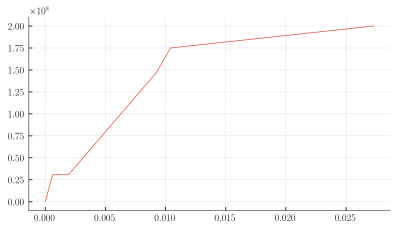

In [130]:
plt.plot(chi_to_M_array,M_to_chi_array)

In [214]:
# eq_f_sy_1_lin = sp.Eq(chi_y1, r + m*M_y_1)
# eq_f_sy_2_lin = eq_f_sy_1_lin.subs(chi_y1, chi_y2).subs(M_y_1, M_y_2)
# eq_f_su_1_lin = sp.Eq(chi_u, r + m*M_R)


# solve_lin_elastisch = sp.solve([eq_f_sy_1_lin,eq_f_sy_2_lin],[r,m])
# solve_lin_bruch = sp.solve([eq_f_sy_1_lin,eq_f_su_1_lin],[r,m])

# m_solve = solve_lin_bruch[m].subs(chi_u, M_R/EI_III).subs(chi_y,M_y / EI_II)
# r_solve = solve_lin_bruch[r].subs(chi_u, M_R/EI_III).subs(chi_y,M_y / EI_II)


# chi_M_elastisch_linear = sp.Eq(chi_M,r_solve + m_solve * M)
# chi_M_u_linear = sp.Eq(chi_M,r_solve + m_solve * M)


Der Zustand 4 beschreibt den Endpunkt des Momenten-Krümmungsdiagramm.

#### Momenten-Krümmungsdiagramm

Abschliessend lässt sich aus der Querschnittsanalyse die Beziehung zwischen Biegemoment und Krümmung ermitteln. Der lineare verlauf im ersten Bereich ergibt sich aus der ungerissenen Biegesteifigkeit. Darauf folgt ein schlagartiger wechsel der Steifigkeit von $EI^I$ zu $EI^{II}$, da der Beton reisst. Dies führt zum Plateau im unteren Bereich. Im Bereich drei werden die zwei definierten Punkte $M_y, \chi_y$ sowie $M_R, \chi_u$ linear verbunden.

In [ ]:
eq_chi_M = sp.Eq(chi_M, sp.Piecewise((0,M<=0),(M/ (EI_I), (M > 0) & (M < eq_M_r.lhs)), (M/(EI_II), (M > eq_M_r.lhs) & (M < M_y)), (chi_M_u_linear.rhs , (M > M_y) & (M < M_R))))


In [ ]:
eq_EI_II_num.evalf(3)

In [ ]:
M_chi_params = [
                eq_EI_I_num.rhs,
                eq_EI_II_num.rhs,
                eq_EI_III_num.rhs,
                eq_M_r_num.rhs,
                eq_M_y2_num.rhs,
                eq_M_R_num.rhs
                ]

for param in enumerate(M_chi_params):
    M_chi_params[param[0]] = np.float64(unit.convert_to(param[1],[unit.m, unit.N]).subs([(unit.m,1),(unit.N,1)]).subs(params_plot))


In [ ]:
#| label: fig-mchi_diagramm_sv14
#| fig-cap: Momenten-Krümmungsdiagramm händisch ermittelt, definiert im positiven Bereich

M_R_num = np.float64(eq_M_R_num.rhs.evalf(4) /unit.m/unit.N)
chi_M_lambda = sp.lambdify((M, EI_I, EI_II, EI_III, M_r, M_y, M_R), eq_chi_M.rhs)
M_array = np.linspace(0,M_R_num * 2, 500)
chi_M_array = chi_M_lambda(M_array, *M_chi_params)
plt.plot(chi_M_array, M_array/1000, color='black')

# Anmerkungen hinzufügen



plt.xlabel(f'${sp.latex(chi_M)}$ [1/m]')
plt.ylabel(f'${sp.latex(M)}$ [kNm]')



plt.savefig('../images/momenten_krummung_SV14.svg')


plt.show()


#### Zustandslinien der Krümmung

Der Biegemomentenverlauf $M(x)$ als Eingabe in die Funktion der Krümmung $\chi(M)$ resultiert zu den Zustandslinie der Krümmung in @fig-chi_x_diagramm. Dargestellt sind die Krümmungsverläufe für die Biegemomentenverläufe aus @fig-m_x und @fig-m_x_versatz.

In [ ]:
chi_M_versuch_2 = []
for M_x in M_x_array:
    chi_M_versuch_2.append(chi_M_lambda(M_x, *M_chi_params))

chi_M_versatz_versuch_2 = []
for M_x in M_x_array_versatz:
    chi_M_versatz_versuch_2.append(chi_M_lambda(M_x, *M_chi_params))


In [ ]:
#| label: fig-chi_x_diagramm_sv14
#| fig-cap: Krümmungsverlauf entlang der Stabachse

plt.plot(x_array, chi_M_versuch_2[-1], color='black', label=f'$F_A =$ {Laststufen[-1]/1000} kN')
# plt.plot(x_array, chi_M_versatz_versuch_2[-1], color='darkgreen', label='Längszugkraft aus Querkraft')


plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'$\chi(x)$ [1/m]')
plt.legend()
plt.savefig('../images/krummungsverlauf_SV14.svg')

plt.show()


#### Punktuelle Bestimmung der Verformung

Unter Anwendung der Arbeitsgleichung kann die Verformung nach @eq-arbeitsgleichung bestimmt werden.

$$
w = \int_0^l \bar{M}(x) \cdot \frac{M(x)}{EI} d_x
$${#eq-arbeitsgleichung}

Wobei $\frac{M(x)}{EI} = \chi(x)$ gilt.

Es gilt die Zustandslinien der Krümmung multipliziert mit der Zustandslinie der Biegemomente in @fig-m_x_diagramm_virtuell des virtuellen Kräftezustands über die Stablänge zu integrieren.

In [ ]:
def M_fiktiv(x_array):
    
    m_fiktiv_array = np.array([])
    
    for x in x_array:
        if x<= 0.2:
            m_fiktiv_array = np.append(m_fiktiv_array, 0)   
        
        if x>=0.2 and x<=2.2:
            m_fiktiv_array = np.append(m_fiktiv_array,x/2-0.1)
            
        if x>=2.2 and x<=4.2:
            m_fiktiv_array = np.append(m_fiktiv_array, - x/2+2.1)
        
        if x>=4.2 and x<=4.4:
            m_fiktiv_array = np.append(m_fiktiv_array, 0)
    
    return m_fiktiv_array

M_x_array_fiktiv = M_fiktiv(x_array)

In [ ]:
#| label: fig-m_x_diagramm_virtuell_sv14
#| fig-cap: Biegemomentenverlauf für den virtuellen Kräftezustand

plt.plot(x_array, M_x_array_fiktiv, color='black')
# plt.plot(x_array, M_x_array_fiktiv, color='darkgreen', label='Längszugkraft aus Querkraft')

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel('$\\bar{M}_x$ [m]')
plt.savefig('../images/M_virtuell_SV14.svg')

plt.show()

In [ ]:
w_1_m_chi = []

for i in range(0, len(M_x_array_versatz)):
    w_1_m_chi.append(np.trapz(M_x_array_fiktiv*chi_M_versuch_2[i], x_array))
    
    
    
w_1_m_chi_versatz = []

for i in range(0, len(M_x_array_versatz)):
    w_1_m_chi_versatz.append(np.trapz(M_x_array_fiktiv*chi_M_versatz_versuch_2[i], x_array))

Für die maximale Last beträgt die Deformation an der Stelle $w_1$ beispielsweise:

In [ ]:
eq_w_1_m_chi = unit.convert_to(sp.Eq(w_1,w_1_m_chi[-1]*unit.m), unit.mm)
eq_w_1_m_chi.evalf(3)

### Zugversteifung

Die bisherige Betrachtung beschränkt sich auf einen schlagartigen Wechsel von ungerissen zu vollständig gerissen. Dabei wird der Bereich zwischen den Rissen ebenfalls als gerissen angenommen. Mittels der Zugversteifung wird ein theoretischer Rissabstand ermittelt und zwischen den Rissen eine versteifte Wirkung zwischen Betonstahl und Beton angenommen (Verbundwirkung). Dies wird folgend auf das Versuchsbeispiel angewendet. Berücksichtigt wird dies unter dem Ansatz von Marti, beschrieben in @Spathelf2022.

Die Krümmungsdifferenez nach Marti beträgt:

In [ ]:
eq_delta_chi_gamma = sp.Eq(delta_chi, sp.Mul(lamb / 2, f_ct * (1-rho_eff)/(rho_eff * E_s*(d-x_2)), evaluate=False))
eq_rho_eff = sp.Eq(rho_eff, (M_r*(d-x_2) * E_s / (f_ct * EI_II)+1-n)**-1)
eq_srm = sp.Eq(s_rm, lamb * diam_s_1*(1-rho_eff)/(4*rho_eff))

eq_sigma_sr0 = sp.Eq(sigma_sr0, F_z2 / A_s)
eq_w_r = sp.Eq(w_r, s_rm * (2*sigma_sr - lamb * sigma_sr0) / (2*E_s))

display(eq_delta_chi_gamma)

Der mechanische Bewehrungsgehalt folgt zu:

In [ ]:
display(eq_rho_eff)

Eine Abschätzung des Rissabstands ist der folgende:

In [ ]:
display(eq_srm)

Die Rissspannung beträgt:

In [ ]:
display(eq_sigma_sr0)

und die Rissbreiten lässt sich folgend beschreiben:

In [ ]:
display(eq_w_r)

Durch das Einsetzen der Versuchsparameter ergeben sich folgende Werte:

In [ ]:
eq_delta_chi_gamma_num = unit.convert_to(eq_subs(eq_delta_chi_gamma, eq_rho_eff, eq_M_r_num, eq_EI_II_num, eq_n_num, eq_x_2_num, eq_d_1_num).subs(params), unit.m)
eq_rho_eff_num = eq_subs(eq_rho_eff, *Eq_list).subs(params)

display(eq_delta_chi_gamma_num.evalf(3), eq_rho_eff_num.evalf(3))
Eq_list.extend([eq_delta_chi_gamma, eq_rho_eff, eq_srm,eq_sigma_sr0, eq_w_r])


In [ ]:
eq_srm_num = eq_subs(eq_srm, eq_rho_eff_num).subs(params)

eq_srm_num.evalf(3)

In [ ]:
eq_chi_M_zugversteifung = sp.Eq(chi_M, sp.Piecewise((0,M<=0),(M/ (EI_I), (M > 0) & (M < eq_M_r.lhs)), (M/(EI_II)-eq_delta_chi_gamma_num.rhs.evalf(3)*unit.m, (M > eq_M_r.lhs) & (M < M_y)), (chi_M_u_linear.rhs , (M > M_y) & (M < M_R))))


Unter Berücksichtigung der beiden $\lambda$-Grenzwerte ist der Einfluss der Zugversteifung im Momente-Krümmungsdiagramm in @fig-mchi_diagramm_zugversteifung gezeigt.

In [ ]:
#| label: fig-mchi_diagramm_zugversteifung_sv14
#| fig-cap: Momenten-Krümmungsdiagramm mit Zugversteifung ergänzt

eq_chi_M_zugversteifung_lambda = sp.lambdify((M,lamb, EI_I, EI_II, EI_III, M_r, M_y, M_R), eq_chi_M_zugversteifung.rhs)

chi_M_zugversteifung_array = eq_chi_M_zugversteifung_lambda(M_array,1, *M_chi_params)
chi_M_zugversteifung_array_05 = eq_chi_M_zugversteifung_lambda(M_array,0.5, *M_chi_params)

plt.plot(chi_M_array, M_array/1000, color='black', linestyle='dashed', label='ohne Zugversteifung')
plt.plot(chi_M_zugversteifung_array, M_array/1000, color='black', linestyle='dotted', label='Zugversteifung $\lambda = 1$')
plt.plot(chi_M_zugversteifung_array_05, M_array/1000, color='black', label='Zugversteifung $\lambda = 0.5$')


plt.xlabel(f'${sp.latex(chi_M)}$ [1/m]')
plt.ylabel(f'${sp.latex(M)}$ [kNm]')
plt.legend()
plt.savefig('../images/Momenten_krummung_zugversteift_SV14.svg')

plt.show()

Es zeigt sich ein steiferes Verhalten im ungerissenen Bereich.

## Fachwerk 



In [ ]:
# Specify the file path
file_path_tot = "src\models\deformation_results_FEM_tot.txt"
file_path_schubbewehrung = "src\models\deformation_results_FEM_schubbewehrung.txt"
file_path_druckstrebe = "src\models\deformation_results_FEM_druckstrebe.txt"
file_path_druckgurt = "src\models\deformation_results_FEM_druckgurt.txt"
file_path_zuggurt = "src\models\deformation_results_FEM_zuggurt.txt"


# Open the file in read mode
with open(file_path_tot, "r") as file:
    # Read each line and convert it back to an integer
    w_1_fachwerk_tot = np.array([float(line.strip()) for line in file])


# Open the file in read mode
with open(file_path_zuggurt, "r") as file:
    # Read each line and convert it back to an integer
    w_1_fachwerk_zuggurt = np.array([float(line.strip()) for line in file])


# Open the file in read mode
with open(file_path_druckgurt, "r") as file:
    # Read each line and convert it back to an integer
    w_1_fachwerk_druckgurt = np.array([float(line.strip()) for line in file])
    
# Open the file in read mode
with open(file_path_schubbewehrung, "r") as file:
    # Read each line and convert it back to an integer
    w_1_fachwerk_schubbewehrung = np.array([float(line.strip()) for line in file])

# Open the file in read mode
with open(file_path_druckstrebe, "r") as file:
    # Read each line and convert it back to an integer
    w_1_fachwerk_druckstrebe = np.array([float(line.strip()) for line in file])


Die bisherigen Analysen beschränken sich auf eine Querschnittsbetrachtung. 
Der Kraftfluss lässt sich mit einem Spannungsfeld detaillierter verfolgen. Eine Einteilung in Parallelfelder und Fächer ist in @fig-spannungsfelder_steil gezeigt. Dabei ist der Neigungswinkel maximal steil gewählt. Die Höhe der Spannungsfelder entspricht dem Hebelarm der inneren Kräfte. Grundsätzlich ist dieser abhängig von der Druckzonenhöhe und der statischen Höhe. Dies zeigte sich bereits bei der Querschnittsanalyse zwischen den Zuständen 1 bis 4. Als Vereinfachung wird eine konstante Höhe vorausgesetzt.


![Spannungsfeld mit steiler Feldneigung](../images/spannungsfelder_sv14.svg){#fig-spannungsfelder_steil}

Durch das Zusammenfassen der Felder zu Streben resultiert das Fachwerk in @fig-fachwerk. Um aus dem Fachwerkmodell zutreffende Deformation zu ermitteln, gilt es den Pendelstäben passende Dehnsteifigkeiten zu zuordnen. 

![Fachwerk aus den ermittelten Spannungsfelder](../images/fachwerk_sv14.svg){#fig-fachwerk}

**Zuggurt:** 

Die Steifigkeit des Zuggurts resultiert aus der Querschnittsfläche der Biegebewehrung und dem Elastizitätsmodul. Dabei wird die Spannungs-Dehnungs-Beziehung gemäss @fig-stahlkennlinie hinterlegt.

**Druckgurt:** 

Die Querschnittsfläche des Druckgurts entspricht der Druckzonenhöhe multipliziert mit der Plattenstreifenbreite. Diese wird als konstant über sämtliche Stäbe des Druckgurtes angenommen. Der Elastizitätsmodul folgt aus der Kennlinie in @fig-betonkennlinie.

**Druckdiagonalen:** 

Die Breite der Druckdiagonalen entspricht der Breite des Spannungsfelds. Vereinfacht gilt dies auch für die Fächer. Die Breite Multipliziert mit der Plattenbreite resultiert zur Querschnittsfläche. Der Elastizitätsmodul folgt ebenfalls aus @fig-betonkennlinie.


**Zugstreben:** 

Die vertikalen Zugstreben bilden die Schubbewehrung ab. Die Querschnittsfläche resultiert aus der Anzahl an Schubdübeln im entsprechenden Spannungsfeld.

![Anordnung der Schubbewehrung im Fachwerk mit steiler Neigung](../images/schubbwehrung_sv14.svg){#fig-schubbew_fw_steil}

Das Spannungsfeld für die gewählte Neigung umfasst zwei Stabreihen. Es ist ein linear elastisches Stoffgesetz hinterlegt.


In [ ]:
n_schubbewehrung = 6
diam_schubbewehrung = 4.3 *un.mm
n_schnittig = 2

As_schubbewehrung = n_schubbewehrung * np.pi * diam_schubbewehrung**2 / 4 * n_schnittig


As_schubbewehrung.to(un.cm**2)

{{< pagebreak >}}

## Modellvergleich

Abgeschlossen wird die Analyse des Dreipunktbiegeversuchs mit einer Gegenüberstellung der angewendeten Methoden. 

In [ ]:
#Biegemomentenverlauf und Zugversteifung

##Krümmungsverlauf
chi_x_versuch_2_zugversteifung_lamba_1 = []
chi_x_versuch_2_zugversteifung_lamba_05 = []


for M_x in M_x_array:
    chi_x_versuch_2_zugversteifung_lamba_1.append(eq_chi_M_zugversteifung_lambda(M_x,1, *M_chi_params))
    chi_x_versuch_2_zugversteifung_lamba_05.append(eq_chi_M_zugversteifung_lambda(M_x,0.5, *M_chi_params))

# Verformung w1
w_1_m_chi_zugversteifung_1 = []
w_1_m_chi_zugversteifung_05 = []

for i in range(0,len(M_x_array)):
    w_1_m_chi_zugversteifung_1.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_zugversteifung_lamba_1[i], x_array))
    w_1_m_chi_zugversteifung_05.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_zugversteifung_lamba_05[i], x_array))





#Längszugkraft und Zugversteifung

##Krümmungsverlauf
chi_x_versuch_2_zugversteifung_lamba_1_versatz = []
chi_x_versuch_2_zugversteifung_lamba_05_versatz = []

for M_x in M_x_array_versatz:
    chi_x_versuch_2_zugversteifung_lamba_1_versatz.append(eq_chi_M_zugversteifung_lambda(M_x,1, *M_chi_params))
    chi_x_versuch_2_zugversteifung_lamba_05_versatz.append(eq_chi_M_zugversteifung_lambda(M_x,0.5, *M_chi_params))

## Verformung w1
w_1_m_chi_zugversteifung_1_versatz = []
w_1_m_chi_zugversteifung_05_versatz = []

for i in range(0,len(M_x_array_versatz)):
    w_1_m_chi_zugversteifung_1_versatz.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_zugversteifung_lamba_1_versatz[i], x_array))
    w_1_m_chi_zugversteifung_05_versatz.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_zugversteifung_lamba_05_versatz[i], x_array))
    
 
    


#konstante Steifigkeit
def chi_M_elastisch(M, EI):
    return M/EI


##Krümmungsverlauf
chi_x_versuch_2_konstant_gerissen = []
chi_x_versuch_2_konstant_ungerissen = []

for M_x in M_x_array:
    chi_x_versuch_2_konstant_ungerissen.append(chi_M_elastisch(M_x,M_chi_params[0]))
    chi_x_versuch_2_konstant_gerissen.append(chi_M_elastisch(M_x, M_chi_params[1]))

## Momenten-Krümmungsbeziehung
chi_M_ungerissen = chi_M_elastisch(M_array, M_chi_params[0])
chi_M_gerissen = chi_M_elastisch(M_array, M_chi_params[1])



## Verformung w1
w_1_elastisch_ungerissen = []
for i in range(0,len(M_x_array_versatz)):
    w_1_elastisch_ungerissen.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_konstant_ungerissen[i], x_array))



## Verformung w1
w_1_elastisch_gerissen = []
for i in range(0,len(M_x_array_versatz)):
    w_1_elastisch_gerissen.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_konstant_gerissen[i], x_array))
    
## Verformung w1 Norm
w_1_norm = []
for w in w_1_elastisch_ungerissen:
    w_1_norm.append(w_1_gerissen_norm_lamb(w))
    



#konstante Steifigkeit und Längszugkraft

##Krümmungsverlauf
chi_x_versuch_2_konstant_gerissen_versatz = []
chi_x_versuch_2_konstant_ungerissen_versatz = []

for M_x in M_x_array_versatz:
    chi_x_versuch_2_konstant_ungerissen_versatz.append(chi_M_elastisch(M_x,M_chi_params[0]))
    chi_x_versuch_2_konstant_gerissen_versatz.append(chi_M_elastisch(M_x, M_chi_params[1]))


## Verformung w1
w_1_elastisch_ungerissen_versatz = []
w_1_elastisch_gerissen_versatz = []

for i in range(0,len(M_x_array_versatz)):
    w_1_elastisch_ungerissen_versatz.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_konstant_ungerissen_versatz[i], x_array))
    w_1_elastisch_gerissen_versatz.append(np.trapz(M_x_array_fiktiv * chi_x_versuch_2_konstant_gerissen_versatz[i], x_array))
    
## Verformung w1 Norm
w_1_norm_versatz = []
for w in w_1_elastisch_ungerissen_versatz:
    w_1_norm_versatz.append(w_1_gerissen_norm_lamb(w))    
 

 
    
#Versuch Tue



w_1_versuch_SV14 = [0, 
0.28571428571428825,
0.44642857142857295,
0.5000000000000027,
0.767857142857145,
1.2500000000000018,
3.3392857142857153,
5.750000000000002,
6.875000000000002,
9.178571428571432,
13.25,
16.78571428571429,
20.85714285714286,
24.28571428571429,
28.035714285714292,
31.571428571428577,
33.392857142857146,
35.160714285714285,
37.410714285714285]


F_A_versuch_SV14 = [0,
5.315436241610726,
7.087248322147644,
8.859060402684563,
11.516778523489918,
14.322147651006702,
20.375838926174495,
28.791946308724818,
33.221476510067106,
41.63758389261744,
57.583892617449656,
69.54362416107382,
78.40268456375838,
84.60402684563758,
92.57718120805369,
99.51677852348993,
102.02684563758389,
103.6510067114094,
104.53691275167785]

    


Der Vergleich im Momentenkrümmungsdiagramm @fig-mchi_diagramm_vergleich ist Belastungsunabhängig. Es zeigt den minimalen Einfluss der Zugversteifung.

In [ ]:
#| label: fig-mchi_diagramm_vergleich_sv14
#| fig-cap: Momenten-Krümmungsdiagramm der unterschiedlichen Methoden

plt.plot(chi_M_ungerissen, M_array/1000, color='black', linestyle='-', label='$EI^{I}$ konstant')
plt.plot(chi_M_gerissen, M_array/1000, color='black', linestyle='dotted', label='$EI^{II}$ konstant')


plt.plot(chi_M_array, M_array/1000, color='brown',  label='ohne Zugversteifung')
plt.plot(chi_M_zugversteifung_array, M_array/1000, color='brown', linestyle='dotted', label='Zugversteifung $\lambda = 1$')
plt.plot(chi_M_zugversteifung_array_05, M_array/1000, color='brown', linestyle='dashed',label='Zugversteifung $\lambda = 0.5$')


plt.xlabel(f'${sp.latex(chi_M)}$ [1/m]')
plt.ylabel(f'${sp.latex(M)}$ [kNm]')
plt.ylim(0,210)
plt.legend()
plt.savefig('../images/momenten_krummung_vergleich_SV14.svg')

plt.show()

Der Krümmungsverlauf bedingt einen Biegemomentenverlauf. Unterschieden wird zwischen der Berücksichtigung der Längszugkraft aus Querkraft, siehe @fig-chi_x_diagramm_vergleich und @fig-chi_x_diagramm_laengszugkraft.

In [ ]:
#| label: fig-chi_x_diagramm_vergleich_sv14
#| fig-cap: Krümmungsverlauf für die maximale Laststufe ohne Längszugkraft
    
plt.plot(x_array,chi_x_versuch_2_konstant_ungerissen[-1], color ='black', linestyle='-', label='$EI^{I}$ konstant' )
plt.plot(x_array,chi_x_versuch_2_konstant_gerissen[-1], color ='black', linestyle='dotted', label='$EI^{II}$ konstant' )



plt.plot(x_array, chi_M_versuch_2[-1], color='red', linestyle='-', label=f'ohne Längszug')
plt.plot(x_array, chi_x_versuch_2_zugversteifung_lamba_1[-1], color='red', linestyle='dotted', label=f'Zugversteifung $\lambda = 1$')
plt.plot(x_array, chi_x_versuch_2_zugversteifung_lamba_05[-1], color='red', linestyle='dashed',label=f'Zugversteifung $\lambda = 0.5$')


plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'$\chi(x)$ [1/m]')
plt.legend(title=f'$F_A =$ {Laststufen[-1]/1000} kN\n')
plt.savefig('../images/krummungsverlauf_zugversteift_SV14.svg')

plt.show()


In [ ]:
#| label: fig-chi_x_diagramm_laengszugkraft_sv14
#| fig-cap: Krümmungsverlauf für die maximale Laststufe mit Längszugkraft durch Querkraft


plt.plot(x_array,chi_x_versuch_2_konstant_ungerissen_versatz[-1], color ='black', linestyle='-', label='$EI^{I}$ konstant' )
plt.plot(x_array,chi_x_versuch_2_konstant_gerissen_versatz[-1], color ='black', linestyle='dotted', label='$EI^{II}$ konstant' )




plt.plot(x_array, chi_M_versatz_versuch_2[-1], color='darkgreen', linestyle='-', label='Längszug')
plt.plot(x_array, chi_x_versuch_2_zugversteifung_lamba_1_versatz[-1], color='darkgreen', linestyle='dotted', label=f'Zugversteifung $\lambda = 1$')
plt.plot(x_array, chi_x_versuch_2_zugversteifung_lamba_05_versatz[-1], color='darkgreen', linestyle='dashed',label=f'Zugversteifung $\lambda = 0.5$')

plt.xlabel(f'${sp.latex(x)}$ [m]')
plt.ylabel(f'$\chi(x)$ [1/m]')
plt.legend(title=f'$F_A =$ {Laststufen[-1]/1000} kN\n')
plt.savefig('../images/krummungsverlauf_zugversteift_laengszugkraft_SV14.svg')

plt.show()


Der Vergleich der Krümmungsverläufe zeigt, dass mit einer konstanten Biegesteifigkeit im Bereich des Fliessens signifikante unterschiede zum verfeinerten Momenten-Krümmungsdiagramm entstehen.

In [ ]:
#| label: fig-last_verformung_sv14
#| fig-cap: Last-Verformungsdiagramm bei der Krafteinleitung $F_A$
def plot_vergleich(border=False, querkraft=False):
    

    if querkraft ==False:
        plt.plot(np.array(w_1_elastisch_ungerissen)*1000, Laststufen/1000,color='black',linestyle='-', label='$EI^{I}$ konstant')
        plt.plot(np.array(w_1_elastisch_gerissen)*1000, Laststufen/1000,color='black',linestyle='dotted', label='$EI^{II}$ konstant')
        plt.plot(np.array(w_1_norm)*1000, Laststufen/1000, color='black',linestyle='dashed', label = 'Abschätzung Norm')
    

        plt.plot(np.array(w_1_m_chi)*1000, Laststufen/1000,color='red', label='Querkraft vernachlässigt')
        plt.plot(np.array(w_1_m_chi_zugversteifung_1)*1000, Laststufen/1000,color='red', linestyle='dotted', label='Zugversteifung $\lambda = 1$')
        plt.plot(np.array(w_1_m_chi_zugversteifung_05)*1000, Laststufen/1000,color='red', linestyle='dashed', label='Zugversteifung $\lambda = 0.5$')

    if querkraft== True:
        
        plt.plot(np.array(w_1_elastisch_ungerissen_versatz)*1000, Laststufen/1000,color='black',linestyle='-', label='$EI^{I}$ konstant')
        plt.plot(np.array(w_1_elastisch_gerissen_versatz)*1000, Laststufen/1000,color='black',linestyle='dotted', label='$EI^{II}$ konstant')
        plt.plot(np.array(w_1_norm_versatz)*1000, Laststufen/1000, color='black',linestyle='dashed', label = 'Abschätzung Norm')
    
        plt.plot(np.array(w_1_m_chi_versatz)*1000, Laststufen/1000, color='darkgreen', label='Längszugkraft')
        plt.plot(np.array(w_1_m_chi_zugversteifung_1_versatz)*1000, Laststufen/1000,color='darkgreen', linestyle='dotted', label='Zugversteifung $\lambda = 1$')
        plt.plot(np.array(w_1_m_chi_zugversteifung_05_versatz)*1000, Laststufen/1000,color='darkgreen', linestyle='dashed', label='Zugversteifung $\lambda = 0.5$')


    
    plt.plot(np.array(w_1_versuch_SV14)-w_1_versuch_SV14[0], F_A_versuch_SV14, color='blue', linestyle='-', label='Versuch SV14')
    
    if border ==True:
        plt.xlim(0,max(np.array(w_1_m_chi_versatz)*1000))

    plt.xlabel(f'${sp.latex(w_1)}$ [mm]')
    plt.ylabel(f'${sp.latex(F_A)}$ [kN]')
    plt.legend()
    plt.savefig('../images/durchbiegung_vergleich_SV14.svg')

    plt.show()


Aussagekräfte sind vor allem die Last-Verformungsdiagramme in @fig-last_verformung_vergleich und @fig-last_verformung_laengszug. Diese unterscheiden sich in der Berücksichtigung der Längszugkraft aus Querkraft. 

In [ ]:
#| label: fig-last_verformung_vergleich_sv14
#| fig-cap: Last-Verformungsdiagramm bei der Krafteinleitung $F_A$ 

plot_vergleich()

Es zeigt sich, dass mit einer konstanten ungerissenen Biegesteifigkeit die Verformungen nicht zufriedenstellen abbildbar sind.  Vor allem im Bereich des Fliessens ist das Modell grundsätzlich nicht mehr zielführend anwendbar. 

Mit einer konstanten gerissenen Biegesteifigkeit nähert man sich den Versuchsergebnissen an. Auch hier ist klar der Bereich des Fliessens des Betonstahls nicht abgedeckt. Für eine Bemessung ist dies jedoch zutreffend, da die Bauteile grundsätzlich nicht bis in den Fliessbereich zu belasten sind.

Die Darstellung der Normabschätzung zeigt eine konservative Abschätzung der Verformungen. Dies führt grundsätzlich zu einer Überbemessung. Die Anwendung des Berechnungsalgorithmus ist jedoch simpel und somit eine solide Grundabschätzung.

Bei der Berücksichtigung des verfeinerten Momenten-Krümmungsdiagramms in rot dargestellt, lässt sich das Verformungsverhalten des Versuchs annähernd abbilden. Das Modell bildet ein zu steifes Verhalten ab. Die Zugversteifung wirkt der Modellgenauigkeit entgegen.

In [ ]:
#| label: fig-last_verformung_laengszug_sv14
#| fig-cap: Last-Verformungsdiagramm bei der Krafteinleitung $F_A$ mit Längszugkraft aus Querkraft

plot_vergleich(querkraft=True)

Die @fig-last_verformung_laengszug zeigt sämtliche Berechnungsmethoden unter Berücksichtung der Längszugkraft aus Querkraft. Es zeigt sich deutlich, dass das Berechnungsmodell mit der Zugversteifung den Versuchsverlauf zufriedenstellend abbildet. Lediglich Abweichungen im höchstlastbereich sind vorhanden. 

Die Normabschätzung zeigt deutliche Abweichungen zu den gemessenen Verformungen. Zwar liegen diese auf der sicheren Seite, sind jedoch äusserst konservativ.

In [ ]:
#| label: fig-last_verformung_fachwerk_sv14
#| fig-cap: Last-Verformungsdiagramm bei der Krafteinleitung $F_A$ mittels Fachwerkmodell
    


plt.plot(np.array(w_1_versuch_SV14)-w_1_versuch_SV14[0], F_A_versuch_SV14, color='blue', linestyle='-', label='Versuch SV14')
plt.plot(np.array(w_1_fachwerk_tot)*1000, Laststufen/1000, color='purple',linestyle='-', label = 'Gesamtverformung mit Fachwerkmodell')
plt.plot(np.array(w_1_fachwerk_zuggurt)*1000, Laststufen/1000, color='purple',linestyle='dotted', label = 'Anteil Zuggurt')
plt.plot(np.array(w_1_fachwerk_druckgurt)*1000, Laststufen/1000, color='purple',linestyle='dashed', label = 'Anteil Druckgurt')
plt.plot(np.array(w_1_fachwerk_schubbewehrung)*1000, Laststufen/1000, color='black',linestyle='-', label = 'Anteil Schubbewehrung')
plt.plot(np.array(w_1_fachwerk_druckstrebe)*1000, Laststufen/1000, color='black',linestyle='dashed', label = 'Anteil Druckstrebe')


plt.xlabel(f'${sp.latex(w_1)}$ [mm]')
plt.ylabel(f'${sp.latex(F_A)}$ [kN]')

# plt.xlim(0,max(np.array(w_1_versuch_A3V2)))

plt.legend()
plt.savefig('../images/durchbiegung_vergleich_fachwerk_SV14.svg')

plt.show()




Das Fachwerkmodell beschreibt den Verlauf ausreichend präzise. Die maximale Deformation mit der rechnerisch ermittelten Höhe, sprich innerem Hebelarm aus der Querschnittsnalyse überschiesst das Ziel bei Weitem. Das Fachwerkmodell reagiert äusserst sensitiv auf die gewählte Höhe. Der Verformungsverlauf lässt sich mit einer Fachwerkshöhe von $160mm$ präzise abbilden. Ohne Kenntnisse der Versuchsresultate wäre jedoch eine präzise Bestimmung der Verformung im Bereich des Fliessens der Zugbewehrung nicht möglich.
